# Project 4 : Predicting players rating

The ultimate Soccer database for data analysis and machine learning.

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team
formations, with player names and a pair of coordinates to indicate their position on the pitch.

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA
video games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

Supervised learning deals with learning a function from available training data. A supervised
learning algorithm analyzes the training data and produces an inferred function, which can be
used for mapping new examples.

Regression is a parametric technique used to predict continuous (dependent) variable given a set
of independent variables. It is parametric in nature because it makes certain assumptions
(discussed next) based on the data set. If the data set follows those assumptions, regression gives
incredible results.

In this project you are going to predict the overall rating of soccer player based on their
attributes such as 'crossing', 'finishing etc.

In [115]:
# https://www.kaggle.com/efezinoerome/analyzing-soccer-data
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [201]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from sklearn import  preprocessing # used for label encoding and imputing NaNs
import datetime as dt

from sklearn.preprocessing import RobustScaler
# boxcox normalisation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import GridSearchCV,  cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [117]:
# keep both files ipynb & sqlite in folder C:\Users\Sanjana\
# C:\Users\Sanjana\puthon 2.ipynb
# C:\Users\Sanjana\database.sqlite     
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [147]:
data = df.copy()

In [ ]:
# parse_dates convert object to dataetime64
#df_train = pd.read_csv('https://raw.githubusercontent.com/AdmiralWen/Sberbank/master/Data/train.csv', parse_dates=['timestamp'])

In [119]:
data.shape

(183978, 42)

In [120]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [121]:
categories = data.select_dtypes(include=['object']).columns
numericals = data.select_dtypes(include=['float64', 'int64']).columns
print('Num of Categories:  ' + str(len(categories)) + '\n' + 'Num of Values:  ', str(len(numericals)))
print('categories :', categories)
print('numericals :', numericals)

Num of Categories:  4
Num of Values:   38
categories : Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')
numericals : Index(['id', 'player_fifa_api_id', 'player_api_id', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [122]:
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
player_fifa_api_id,218353,218353,218353,218353,218353,189615,189615,189615,189615,189615
player_api_id,505942,505942,505942,505942,505942,155782,155782,155782,155782,155782
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00,2016-04-21 00:00:00,2016-04-07 00:00:00,2016-01-07 00:00:00,2015-12-24 00:00:00,2015-12-17 00:00:00
overall_rating,67,67,62,61,61,74,74,73,73,73
potential,71,71,66,65,65,76,76,75,75,75
preferred_foot,right,right,right,right,right,left,left,left,left,left
attacking_work_rate,medium,medium,medium,medium,medium,high,high,high,high,high
defensive_work_rate,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
crossing,49,49,49,48,48,80,80,79,79,79


In [123]:
data.tail(10).transpose()

,183968,183969,183970,183971,183972,183973,183974,183975,183976,183977
id,183969,183970,183971,183972,183973,183974,183975,183976,183977,183978
player_fifa_api_id,102359,102359,102359,102359,102359,102359,102359,102359,102359,102359
player_api_id,39902,39902,39902,39902,39902,39902,39902,39902,39902,39902
date,2012-08-31 00:00:00,2012-02-22 00:00:00,2011-08-30 00:00:00,2011-02-22 00:00:00,2010-08-30 00:00:00,2009-08-30 00:00:00,2009-02-22 00:00:00,2008-08-30 00:00:00,2007-08-30 00:00:00,2007-02-22 00:00:00
overall_rating,78,81,81,81,83,83,78,77,78,80
potential,78,81,81,85,85,85,80,80,81,81
preferred_foot,right,right,right,right,right,right,right,right,right,right
attacking_work_rate,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
defensive_work_rate,low,low,low,low,low,low,low,low,low,low
crossing,77,80,80,81,84,84,74,74,74,74


# Data analysis :

In [124]:
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [125]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [126]:
data.describe(include = 'O')

,date,preferred_foot,attacking_work_rate,defensive_work_rate
count,183978,183142,180748,183142
unique,197,2,8,19
top,2007-02-22 00:00:00,right,medium,medium
freq,11794,138409,125070,130846


In [127]:
data.preferred_foot.value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [128]:
data.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [129]:
data.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [130]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data_percent = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False)
    
missing_report = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percentage'])
missing_report

,Total,Percentage
attacking_work_rate,3230,1.755645
volleys,2713,1.474633
agility,2713,1.474633
balance,2713,1.474633
sliding_tackle,2713,1.474633
jumping,2713,1.474633
vision,2713,1.474633
curve,2713,1.474633
gk_reflexes,836,0.454402
long_passing,836,0.454402


In [246]:
data[pd.isnull(data['preferred_foot'])].head() 
data[pd.isnull(data['balance'])].head() 

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,timedelta


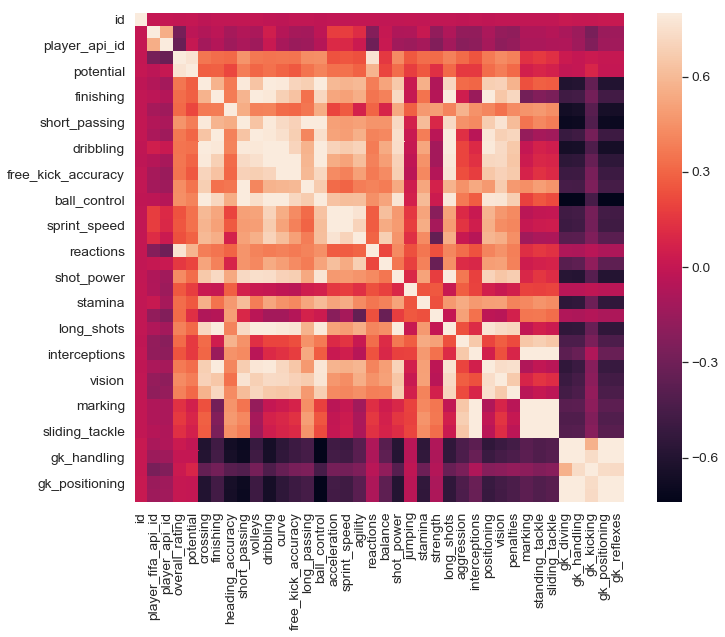

In [31]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8, square=True)

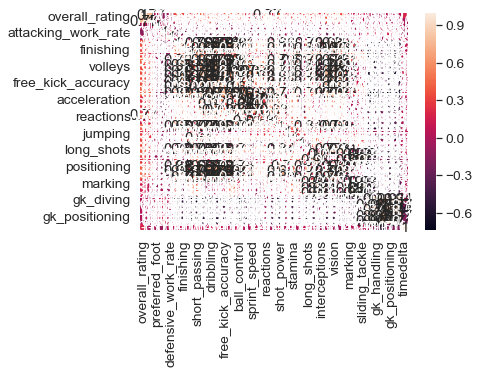

In [249]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

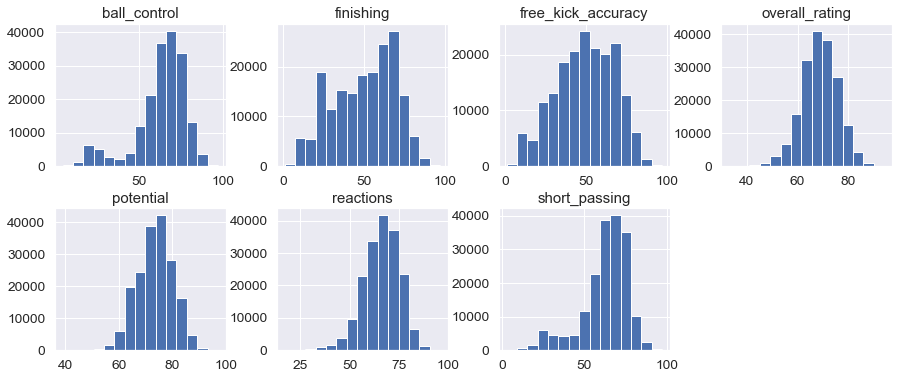

In [32]:
sig_numerical = ["overall_rating", "potential", "finishing", "short_passing", "free_kick_accuracy", "ball_control", "reactions"]
dis = data[sig_numerical].hist(bins=15, figsize=(15,6), layout=(2,4))

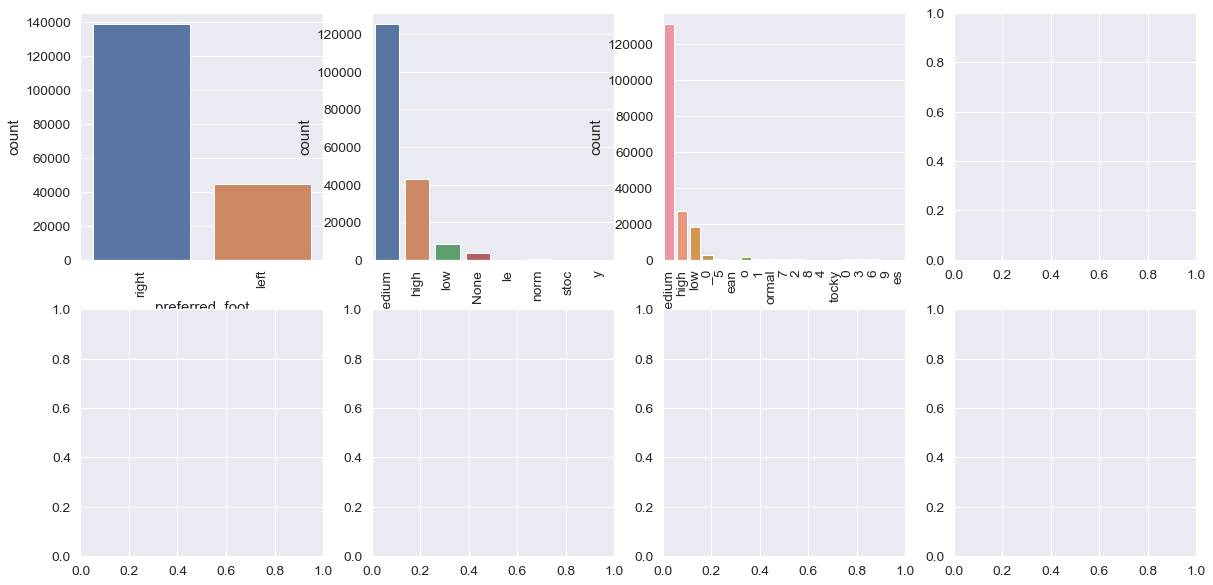

In [34]:
sig_categorical = ["preferred_foot", "attacking_work_rate", "defensive_work_rate"]
fig, ax = plt.subplots(2,4, figsize=(20,10))

# Loop over every categorical variable to create countplot
for var, subplot in zip(sig_categorical, ax.flatten()):
    sns.countplot(data[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [39]:
cols  # top 9 feature are having max correlation with overall_rating

Index(['overall_rating', 'reactions', 'potential', 'short_passing',
       'ball_control', 'long_passing', 'vision', 'shot_power', 'penalties',
       'long_shots'],
      dtype='object')

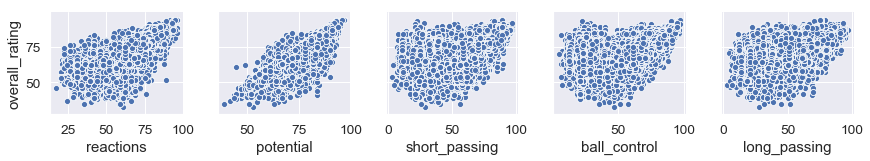

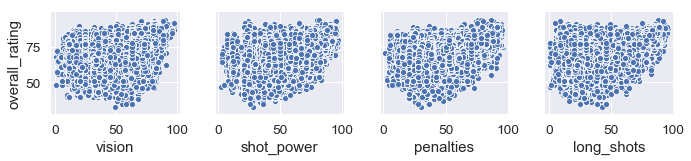

In [40]:
chartA = sns.pairplot(data=data,x_vars=['reactions', 'potential', 'short_passing',
       'ball_control', 'long_passing' ],y_vars=['overall_rating'])

chartB = sns.pairplot(data=data,x_vars=['vision', 'shot_power', 'penalties', 'long_shots'],y_vars=['overall_rating'])

In [131]:
data['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [132]:
or_median = data.overall_rating.median()
data.overall_rating.fillna(or_median,inplace=True) 

Kurt: 0.2844157194017285
Skew: -0.20059112712170113


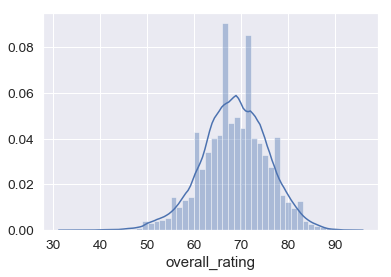

In [133]:
sns.distplot(data['overall_rating'])
print('Kurt: ' + str(kurtosis(data['overall_rating'])) + '\n' + 'Skew: ' +str(skew(data['overall_rating'])))

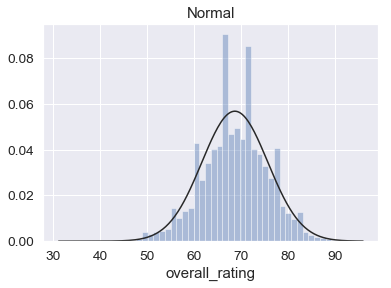

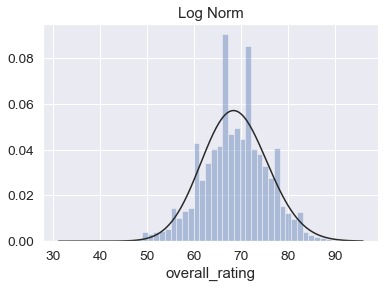

In [134]:
plt.figure(1); plt.title('Normal')
sns.distplot(data['overall_rating'], kde=False, fit=stats.norm)

plt.figure(2); plt.title('Log Norm')
sns.distplot(data['overall_rating'], kde=False, fit=stats.lognorm)

both looks good. So we can take normal 'overall_rating'

In [150]:
data['date'] = pd.to_datetime(data['date'])
#data['date'] = pd.Timestamp(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [151]:
data['date'].head()

0   2016-02-18
1   2015-11-19
2   2015-09-21
3   2015-03-20
4   2007-02-22
Name: date, dtype: datetime64[ns]

In [152]:
# Convert the date into a number (of days since some point)
fromDate = min(data['date'])
data['timedelta'] = (data['date'] - fromDate).dt.days.astype(int)
#data['timedelta'] = (data['date'] - fromDate).astype(int)
print(data[['date', 'timedelta']].head())
#   timestamp  timedelta
#0 2011-08-20          0
#1 2011-08-23          3
#2 2011-08-27          7
#3 2011-09-01         12
#4 2011-09-05         16
data.drop('date', axis = 1, inplace = True)

        date  timedelta
0 2016-02-18       3283
1 2015-11-19       3192
2 2015-09-21       3133
3 2015-03-20       2948
4 2007-02-22          0


In [153]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [154]:
dfi  = DataFrameImputer()   # Initialize the imputer
dfi.fit(data)              # Fit the imputer

data = dfi.transform(data)

In [155]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data_percent = ((data.isnull().sum() / data.isnull().count()) * 100).sort_values(ascending=False)
    
missing_report = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percentage'])
missing_report

,Total,Percentage
timedelta,0,0.0
heading_accuracy,0,0.0
acceleration,0,0.0
ball_control,0,0.0
long_passing,0,0.0
free_kick_accuracy,0,0.0
curve,0,0.0
dribbling,0,0.0
volleys,0,0.0
short_passing,0,0.0


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
overall_rating         183978 non-null float64
potential              183978 non-null float64
preferred_foot         183978 non-null object
attacking_work_rate    183978 non-null object
defensive_work_rate    183978 non-null object
crossing               183978 non-null float64
finishing              183978 non-null float64
heading_accuracy       183978 non-null float64
short_passing          183978 non-null float64
volleys                183978 non-null float64
dribbling              183978 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183978 non-null float64
long_passing           183978 non-null float64
ball_control           183978 non-null float64
acceleration           183978 non-null float64
sprin

In [157]:
for c in data.columns:
    if data[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[c].values)) 
        data[c] = lbl.transform(list(data[c].values))

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
overall_rating         183978 non-null float64
potential              183978 non-null float64
preferred_foot         183978 non-null int64
attacking_work_rate    183978 non-null int64
defensive_work_rate    183978 non-null int64
crossing               183978 non-null float64
finishing              183978 non-null float64
heading_accuracy       183978 non-null float64
short_passing          183978 non-null float64
volleys                183978 non-null float64
dribbling              183978 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183978 non-null float64
long_passing           183978 non-null float64
ball_control           183978 non-null float64
acceleration           183978 non-null float64
sprint_s

In [160]:
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
player_fifa_api_id,218353.0,218353.0,218353.0,218353.0,218353.0,189615.0,189615.0,189615.0,189615.0,189615.0
player_api_id,505942.0,505942.0,505942.0,505942.0,505942.0,155782.0,155782.0,155782.0,155782.0,155782.0
overall_rating,67.0,67.0,62.0,61.0,61.0,74.0,74.0,73.0,73.0,73.0
potential,71.0,71.0,66.0,65.0,65.0,76.0,76.0,75.0,75.0,75.0
preferred_foot,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
attacking_work_rate,4.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0
defensive_work_rate,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
crossing,49.0,49.0,49.0,48.0,48.0,80.0,80.0,79.0,79.0,79.0
finishing,44.0,44.0,44.0,43.0,43.0,53.0,53.0,52.0,51.0,51.0


In [170]:
data_drop = data.drop(['id', 'player_fifa_api_id', 'player_api_id'], axis=1, inplace = True)         

In [207]:
data_FE = data.copy()

In [208]:
data_FE.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,timedelta
0,67.0,71.0,1,4,15,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,3283
1,67.0,71.0,1,4,15,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,3192
2,62.0,66.0,1,4,15,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,3133
3,61.0,65.0,1,4,15,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2948
4,61.0,65.0,1,4,15,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0


# Normalisation

In [209]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in data_FE:
    if data_FE[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = data_FE[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews = skews.drop(['overall_rating'], axis=0)     # dependant feature

In [210]:
skew_features

gk_diving              2.967725
gk_reflexes            2.769458
gk_positioning         2.740912
gk_handling            2.720820
gk_kicking             1.523032
potential             -0.040041
marking               -0.098555
sliding_tackle        -0.189267
overall_rating        -0.200591
free_kick_accuracy    -0.213553
standing_tackle       -0.245509
finishing             -0.290100
interceptions         -0.300023
volleys               -0.355179
penalties             -0.472572
curve                 -0.474964
reactions             -0.501002
jumping               -0.519699
balance               -0.590944
agility               -0.603762
long_shots            -0.604192
aggression            -0.632927
strength              -0.645659
long_passing          -0.658623
vision                -0.661473
positioning           -0.737728
crossing              -0.742600
acceleration          -0.745227
sprint_speed          -0.816112
timedelta             -0.818301
heading_accuracy      -0.897562
stamina 

In [211]:
high_skew = skew_features[skew_features > 0.75]
skew_index = high_skew.index
   
for i in high_skew.index:
    data_FE[i]= boxcox1p(data_FE[i], boxcox_normmax(data_FE[i]+1))
        
skew_features2 = data_FE[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
print(skews2.to_string())

                         skew
potential           -0.040041
gk_positioning      -0.078919
gk_handling         -0.081110
gk_reflexes         -0.089750
marking             -0.098555
gk_kicking          -0.172674
gk_diving           -0.174292
sliding_tackle      -0.189267
overall_rating      -0.200591
free_kick_accuracy  -0.213553
standing_tackle     -0.245509
finishing           -0.290100
interceptions       -0.300023
volleys             -0.355179
penalties           -0.472572
curve               -0.474964
reactions           -0.501002
jumping             -0.519699
balance             -0.590944
agility             -0.603762
long_shots          -0.604192
aggression          -0.632927
strength            -0.645659
long_passing        -0.658623
vision              -0.661473
positioning         -0.737728
crossing            -0.742600
acceleration        -0.745227
sprint_speed        -0.816112
timedelta           -0.818301
heading_accuracy    -0.897562
stamina             -0.926161
shot_power

In [212]:
scaler = RobustScaler()

X_train = data_FE.drop(['overall_rating'], axis=1)
#y_train = data_FE['overall_rating']
y_train_logged = np.log(data_FE['overall_rating'])

X_train_scaled = scaler.fit(X_train).transform(X_train)

# Feature Importance

In [213]:
#L1 penalties (lasso) will exclude variables that are not too well correlated.
lasso_fi=Lasso(alpha=0.001)
#lasso_fi.fit(X_train_scaled,y_train)
lasso_fi.fit(X_train_scaled,y_train_logged)
FI_lasso = pd.DataFrame({"Feature Importance":lasso_fi.coef_}, index=X_train.columns)
FI_sorted = FI_lasso.sort_values("Feature Importance",ascending=False)
print(FI_sorted.to_string())

                     Feature Importance
potential                      0.063882
reactions                      0.045515
strength                       0.019902
timedelta                      0.016399
gk_diving                      0.012641
long_passing                   0.009068
penalties                      0.005828
jumping                        0.005191
ball_control                   0.004549
crossing                       0.003883
shot_power                     0.003033
gk_reflexes                    0.002126
gk_handling                    0.001481
free_kick_accuracy             0.001455
gk_kicking                     0.001432
gk_positioning                 0.001399
aggression                     0.000834
vision                         0.000746
heading_accuracy               0.000019
balance                       -0.000000
dribbling                     -0.000000
agility                       -0.000000
sliding_tackle                -0.000000
standing_tackle               -0.000000


# Models :

Assessing Models: We utilised the Root Mean Squared Error (RMSE) to identify the performance of the train and test, ultimately, to indicate any overfitting/underfitting in the models. Cross Validation assisted us with running permutations of the different parameters to produce the most effective model with the least RMSE

Models Performed:

Linear Regression

Ridge

Lasso

DecisionTree Regressor

In [216]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y_train, test_size=0.2, random_state=101) 
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled,y_train_logged, test_size=0.3, random_state=101) 

In [218]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)     # RMSE: 3.0328256323471563 -- with y only
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))

RMSE: 0.046702900775726475


In [220]:
dtr = DecisionTreeRegressor(max_depth=200)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)          # RMSE: 1.3740762939098192 -- with y only
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.02081273643885616


In [221]:
sgd = SGDRegressor(loss = "squared_loss", average=True)
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)      # RMSE: 3.0352114266329075 -- with y only
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.04725771272306035


In [222]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)            # RMSE: 3.0328256323471563 -- with y only
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.0467131484627206


In [223]:
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)       # RMSE: 3.0328256323471563 -- with y only
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.046702573569901894


In [224]:
rfr = RandomForestRegressor(max_depth=20, n_estimators=100)
#import time
start_time = time.time()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)            # RMSE: 0.9383437305528581 -- with y only
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
stop_time = time.time()
print("Execution time in %.2fs" % (stop_time - start_time) + ' ms')

RMSE: 0.014590981876752661


In [228]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, svr_pred)))

RMSE: 0.03736390154274535


In [229]:
prediction = np.round( np.exp( rfr.predict(X_test) ) )
print(prediction.reshape(-1,1))

[[81.]
 [72.]
 [65.]
 ...
 [79.]
 [69.]
 [76.]]


In [ ]:
################### Variable importance
# Create a dataframe of the variable importances
df_ = pd.DataFrame(data_FE.columns, columns = ['feature'])
df_['fscore'] = rfr.feature_importances_[:, ]

# Plot the relative importance of the top 10 features
df_['fscore'] = df_['fscore'] / df_['fscore'].max()
df_.sort_values('fscore', ascending = False, inplace = True)
df_ = df_[0:10]
df_.sort_values('fscore', ascending = True, inplace = True)
df_.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('Random forest feature importance', fontsize = 24)
plt.xlabel('')
plt.ylabel('')
plt.xticks([], [])
plt.yticks(fontsize=20)
plt.show()

# Project 5 : Application of Classification Model

Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

48842 instances, mix of continuous and discrete (train=32561, test=16281)

45222 if instances with unknown values are removed (train=30162, test=15060)

Duplicate or conflicting instances : 6

Class probabilities for adult.all file

Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

Problem 2:
Which factors are important

Problem 3:
Which algorithms are best for this dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [5]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education',
'education_num', 'marital_status', 'occupation','relationship', 'race',
'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [7]:
train_set.shape    # (32561, 15)
#test_set.shape      #(16281, 15)

(32561, 15)

In [8]:
train_set.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Data analysis :

In [12]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
train_set.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [14]:
categories = train_set.select_dtypes(include=['object']).columns
numericals = train_set.select_dtypes(include=['float64', 'int64']).columns
print('Num of Categories:  ' + str(len(categories)) + '\n' + 'Num of Values:  ', str(len(numericals)))
print('categories :', categories)
print('numericals :', numericals)

Num of Categories:  9
Num of Values:   6
categories : Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')
numericals : Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [15]:
missing_data = train_set.isnull().sum().sort_values(ascending=False)
missing_data_percent = ((train_set.isnull().sum() / train_set.isnull().count()) * 100).sort_values(ascending=False)
    
missing_report = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percentage'])
missing_report

,Total,Percentage
wage_class,0,0.0
native_country,0,0.0
hours_per_week,0,0.0
capital_loss,0,0.0
capital_gain,0,0.0
sex,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital_status,0,0.0


In [16]:
missing_data = test_set.isnull().sum().sort_values(ascending=False)
missing_data_percent = ((test_set.isnull().sum() / test_set.isnull().count()) * 100).sort_values(ascending=False)
    
missing_report = pd.concat([missing_data, missing_data_percent], axis=1, keys=['Total', 'Percentage'])
missing_report

,Total,Percentage
wage_class,0,0.0
native_country,0,0.0
hours_per_week,0,0.0
capital_loss,0,0.0
capital_gain,0,0.0
sex,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital_status,0,0.0


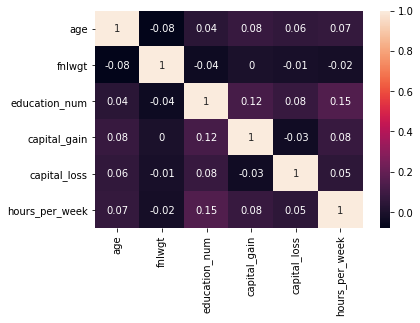

In [17]:
correlation_matrix = train_set.corr().round(2)
# annot = True to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True)

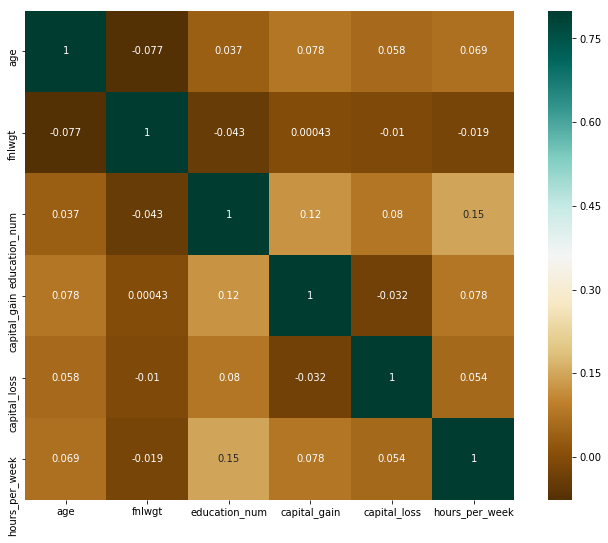

In [18]:
hmap = train_set.corr()
plt.subplots(figsize=(12, 9))
sb.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [19]:
#Calculate percentage of different-2 classes in the Pandas dataframe
from collections import Counter

dict = Counter(train_set['wage_class'])
print(f"dictionary with all classes : {dict}")
print(f"Keys for the different-2 classes : {dict.keys()}")
print(f"dict[' >50K'] : {dict[' >50K']} , dict[' <=50K'] : {dict[' <=50K']}")
print(f"Class 1 percentage : {dict[' >50K']/len(train_set)*100} , Class 2 percentage : {dict[' <=50K']/len(train_set)*100}")

dictionary with all classes : Counter({' <=50K': 24720, ' >50K': 7841})
Keys for the different-2 classes : dict_keys([' <=50K', ' >50K'])
dict[' >50K'] : 7841 , dict[' <=50K'] : 24720
Class 1 percentage : 24.080955744602438 , Class 2 percentage : 75.91904425539757


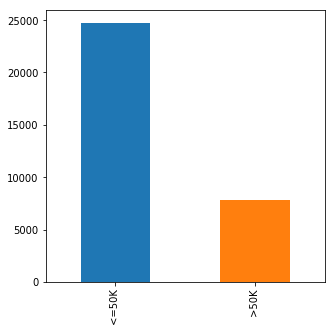

In [20]:
train_set['wage_class'].value_counts()
train_set['wage_class'].value_counts().plot(kind='bar',figsize=(5,5))

In [21]:
train = train_set.copy()
test = test_set.copy()

In [22]:
print('workclass',train.workclass.unique())
print('education',train.education.unique())
print('marital-status',train['marital_status'].unique())
print('occupation',train.occupation.unique())
print('relationship',train.relationship.unique())
print('race',train.race.unique())
print('sex',train.sex.unique())
print('native-country',train['native_country'].unique())
print('workclass',train.workclass.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native-country [' United-States' ' Cuba' ' Jamaica' ' India' '

In [104]:
#Converting Categorical variables into Quantitative variables
#print(set(train['occupation']))
#train['occupation'] = train['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
#                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
#                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
#                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
#                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
#                                                       'protective-serv': 14})

#train['wage_class'] = train['wage_class'].map({'<=50K': 0, '>50K': 1})
#train['sex'] = train['sex'].map({'Male': 0, 'Female': 1})
#train['race'] = train['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
#                                    'Amer-Indian-Eskimo': 4})

#train['marital_status'] = train['marital_status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
#                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
#                                                             'Never-married': 5, 'Married-AF-spouse': 6})

In [23]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int64
wage_class        32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [25]:
#creating fnlwgt bands
train['fnlwgt'] = pd.qcut(train.fnlwgt,4,labels=False)

In [26]:
#creating fnlwgt bands
train['education_num'] = pd.qcut(train.education_num,4,labels=False)

In [27]:
train.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,0,9,3,4,1,1,4,1,2174,0,40,39,0
1,50,6,0,9,3,2,4,0,4,1,0,0,13,39,0
2,38,4,2,11,0,0,6,1,4,1,0,0,40,39,0
3,53,4,2,1,0,2,6,0,2,1,0,0,40,39,0
4,28,4,3,9,3,2,10,5,2,0,0,0,40,5,0
5,37,4,3,12,3,2,4,5,4,0,0,0,40,39,0
6,49,4,1,6,0,3,8,1,2,0,0,0,16,23,0
7,52,6,2,11,0,2,4,0,4,1,0,0,45,39,1
8,31,4,0,12,3,4,10,1,4,0,14084,0,50,39,1
9,42,4,1,9,3,2,4,0,4,1,5178,0,40,39,1


In [28]:
X = train.drop("wage_class",axis=1) 
y = train["wage_class"]

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Use RandomForestClassifier to check feature_importances
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X, y)

feature_importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,4)})
feature_importances = feature_importances.sort_values('importance',ascending=False).set_index('feature')

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


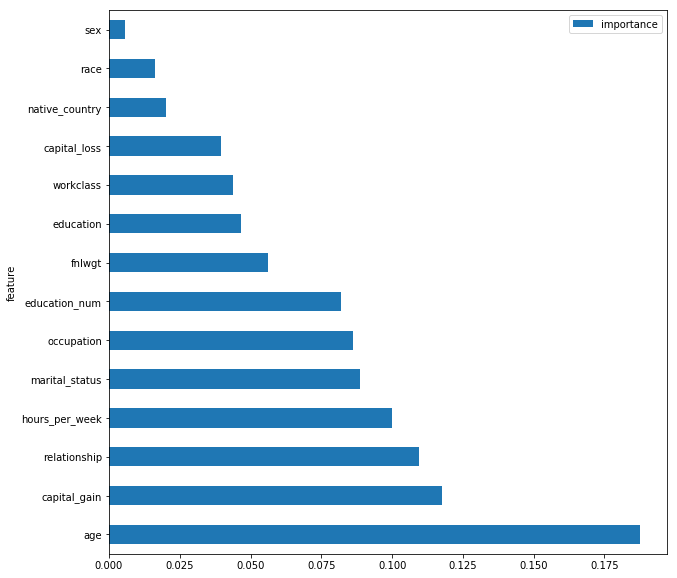

In [30]:
#Visualize top 20 features of the dataframe
feature_importances[:20].plot(kind='barh',figsize=(10,10))

# Building ML models :

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
#from sklearn import svm   

In [32]:
#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [33]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of the Logistic Regression is 0.8247517657897431


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
print(precision_score(y_test, logreg_pred) )
print(recall_score(y_test, logreg_pred) )
print(f1_score(y_test, logreg_pred) )
print(accuracy_score(y_test, logreg_pred) )

0.7022849462365591
0.4515989628349179
0.5497106785902157
0.8247517657897431


In [35]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
rf_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

C:\Users\Sanjana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest Model is 0.8483979936533934


In [36]:
print(precision_score(y_test, rf_pred) )
print(recall_score(y_test, rf_pred) )
print(f1_score(y_test, rf_pred) )
print(accuracy_score(y_test, rf_pred) )

0.7193259610321222
0.5903197925669835
0.6484690244481367
0.8483979936533934


In [37]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
dt_pred = decisiontree.predict(X_test)
score_decisiontree = decisiontree.score(X_test,y_test)
print('The accuracy of the Decision Tree Model is', score_decisiontree)

The accuracy of the Decision Tree Model is 0.8072474152932746


In [38]:
print(precision_score(y_test, dt_pred) )
print(recall_score(y_test, dt_pred) )
print(f1_score(y_test, dt_pred) )
print(accuracy_score(y_test, dt_pred) )

0.5900543251149185
0.6101987899740708
0.5999575100913532
0.8072474152932746


In [39]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
score_gbc = gbc.score(X_test,y_test)
print('The accuracy of the Gradient Boosting  Model is', score_gbc)

The accuracy of the Gradient Boosting  Model is 0.8689732828334528


In [40]:
print(precision_score(y_test, gbc_pred) )
print(recall_score(y_test, gbc_pred) )
print(f1_score(y_test, gbc_pred) )
print(accuracy_score(y_test, gbc_pred) )

0.7917607223476298
0.6063094209161625
0.6867351933431228
0.8689732828334528


In [41]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.8351929573139523


In [42]:
print(precision_score(y_test, knn_pred) )
print(recall_score(y_test, knn_pred) )
print(f1_score(y_test, knn_pred) )
print(accuracy_score(y_test, knn_pred) )

0.6588447653429603
0.6309420916162489
0.6445916114790288
0.8351929573139523


In [43]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
nb_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8052001228375474


In [44]:
print(precision_score(y_test, nb_pred) )
print(recall_score(y_test, nb_pred) )
print(f1_score(y_test, nb_pred) )
print(accuracy_score(y_test, nb_pred) )

0.6807387862796834
0.334485738980121
0.4485656331498117
0.8052001228375474


In [45]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(gbc,X,y,cv=10)
 
np.mean(cv_scores)*100

86.45314212669139

Problem 3: Which algorithms are best for this dataset ?

Gradient Boosting Classifier model has given best scores.

precision : 0.79
recall : 0.61
F1 : 0.69
accuracy : 0.87

In [48]:
############# ROC Curve  ###########
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities
probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)            # 0.920  - AUC should be > 0.5

AUC: 0.920


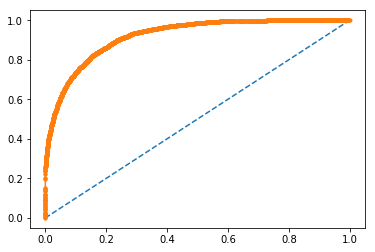

In [49]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [50]:
############# Precision - Recall (PR) Curve  ###########
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# predict probabilities
probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = gbc.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))    #f1=0.687 auc=0.813 ap=0.813  -- auc > 0.5

f1=0.687 auc=0.813 ap=0.813


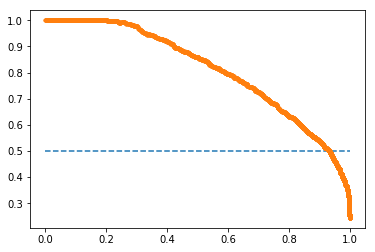

In [51]:
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [47]:
#Problem 1: Prediction task is to determine whether a person makes over 50K a year.
gbc_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

Problem 2: Which factors are important ?
    
RandomForestClassifier used above to check feature_importances

In [ ]:
#svc = svm.SVC(kernel='linear')
#svc.fit(X_train, y_train)
#y_pred = svc.predict(X_test)
#score_svc = svc.score(X_test,y_test)
#print('The accuracy of SVM is', score_svc)

# Project 6: Application of Clustering Model

Dataset Link : https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
        
Problem 1: There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

Problem 2: How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

Problem 3: Identify which all stocks are moving together and which all stocks are different from
each other.

In [35]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [36]:
data = pd.read_csv('C:\\Acadgild docs\\data_stocks.csv')

In [37]:
data.shape

(41266, 502)

In [38]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [40]:
data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [41]:
X = data.drop(["DATE", "SP500"] ,axis=1) 

In [42]:
X.columns

Index(['NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP',
       'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT',
       'NASDAQ.AMD',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=500)

In [67]:
from sklearn.preprocessing import StandardScaler
features = X.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)
print('Shape of Scaled features : ')
print(X_scaled.shape)

Shape of Scaled features : 
(41266, 500)


PCA Analysis

In [73]:
# Do a PCA analysis
pca = PCA(n_components=10)
#pca = PCA()

In [74]:
# Fit the PCA 
X_pca = pca.fit(X_scaled)

In [75]:
X_pca_trans = pca.transform(X_scaled)

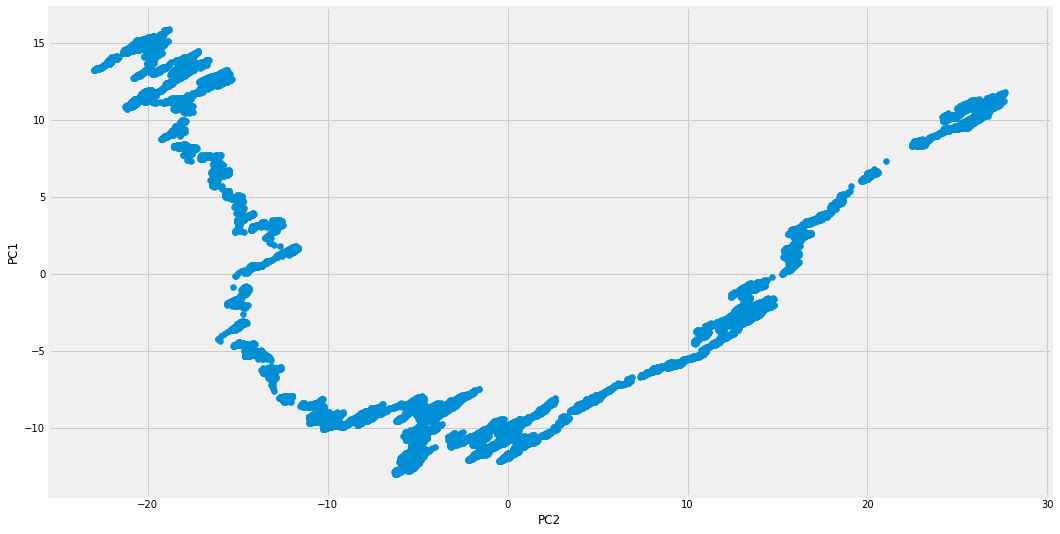

In [76]:
# Plot the PCA components 
plt.figure(figsize=(16,9))
plt.scatter(X_pca_trans[:,0],X_pca_trans[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

In [77]:
(X_pca.explained_variance_ratio_)*100  # we have to take 90 to 95 %, this case first 2 features

array([47.03057453, 17.23237495, 12.02043054,  4.85448633,  3.79879036,
        2.80801648,  2.00043893,  1.30621672,  1.04896955,  0.75169382])

In [78]:
X_pca.explained_variance_   # Eigen values , same as iris_lamda earlier

array([235.15857127,  86.16396277,  60.10360918,  24.27301984,
        18.99441209,  14.04042263,  10.00243702,   6.53124189,
         5.24497484,   3.75856017])

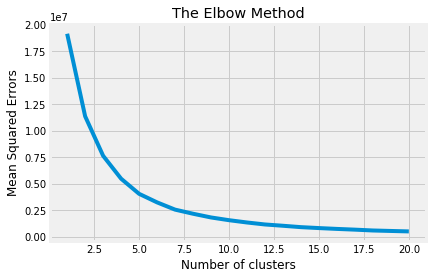

In [81]:
#Finding optimum number of clusters for KMEANS cluster¶
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_pca_trans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

Optimum number of cluster from the elbow method is determined to be 5

In [ ]:
import scikitplot
scikitplot.cluster.plot_elbow_curve(KMeans(),X_pca_trans,cluster_ranges=range(1,20))

KMeans Clustering

In [ ]:
# Find the number of clusters

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [82]:
# Fit the K Means with 5 clusters
k_means = KMeans(n_clusters=5, random_state=0,max_iter=3000) 
y_means = k_means.fit_predict(X)

In [83]:
# Display the cluster centers
k_means.cluster_centers_

array([[ 43.77358132, 142.98696747, 130.74934798, ...,  64.62368362,
        120.79942516,  53.63660808],
       [ 46.2734716 , 160.11520883, 150.24007608, ...,  76.00650235,
        112.7923117 ,  61.19815181],
       [ 49.26457875, 148.64841274, 141.54205293, ...,  73.30668488,
        124.86423224,  62.56597652],
       [ 45.09849074, 151.07393826, 135.6250932 , ...,  68.61520574,
        118.89374393,  58.85615306],
       [ 51.72587735, 151.06200533, 146.92356499, ...,  74.45093304,
        125.61319585,  62.33830194]])

In [85]:
# Predicted Values 
k_means.labels_.ravel()

array([0, 0, 0, ..., 1, 1, 1])

In [86]:
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)

In [87]:
k_means_labels = metrics.pairwise_distances_argmin(X, k_means_cluster_centers)

Identify which all stocks are moving together and which all stocks are different from each other. 
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

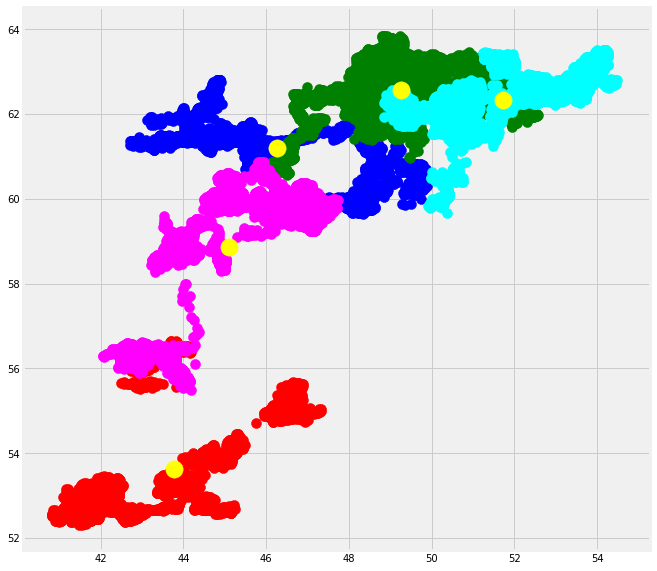

In [88]:
# Plot the cluster values. 
plt.figure(figsize=(10,10))
plt.scatter(X.iloc[y_means == 0,0], X.iloc[y_means == 0,499], s= 100, color = 'red')
plt.scatter(X.iloc[y_means == 1,0], X.iloc[y_means == 1,499], s= 100, color = 'blue')
plt.scatter(X.iloc[y_means == 2,0], X.iloc[y_means == 2,499], s= 100, color = 'green')
plt.scatter(X.iloc[y_means == 3,0], X.iloc[y_means == 3,499], s= 100, color = 'magenta')
plt.scatter(X.iloc[y_means == 4,0], X.iloc[y_means == 4,499], s= 100, color = 'cyan')

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 499], s= 300, color = 'yellow')
plt.show()

In [89]:
# How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
print ('Number of patterns in the first cluster  :  ', X.iloc[y_means == 0,0].size)
print ('Number of patterns in the second cluster :  ', X.iloc[y_means == 1,0].size)
print ('Number of patterns in the third cluster  :  ', X.iloc[y_means == 2,0].size)
print ('Number of patterns in the fourth cluster :  ', X.iloc[y_means == 3,0].size)
print ('Number of patterns in the fifth cluster  :  ', X.iloc[y_means == 4,0].size)

Number of patterns in the first cluster  :   6976
Number of patterns in the second cluster :   6647
Number of patterns in the third cluster  :   12029
Number of patterns in the fourth cluster :   6709
Number of patterns in the fifth cluster  :   8905


In [91]:
#How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
X_comp = pd.DataFrame(pca.components_,columns=X.columns)
X_comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,...,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,...,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501
2,-0.039858,0.064165,0.012079,0.043266,-0.037239,0.040506,-0.053892,-0.051099,0.030738,-0.086428,...,-0.003223,0.022125,0.059617,-0.034587,-0.028712,-0.039074,-0.004342,0.021010,-0.066373,0.023570
3,0.007578,0.077164,0.008564,-0.027896,-0.017418,0.008973,-0.032239,0.034448,0.051511,-0.077594,...,0.021692,0.060885,-0.039630,0.027694,0.012100,-0.039575,0.002900,-0.002703,-0.049420,0.015160
4,-0.033303,-0.016981,0.002438,-0.038330,-0.102023,-0.034831,-0.011187,0.037595,-0.039683,-0.014357,...,-0.036672,-0.011451,-0.030314,-0.012030,-0.045731,0.029255,-0.003013,-0.001339,-0.003603,0.005364


# Project 7 : Time Series Model

Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
#import statsmodels
import statsmodels.api as sm
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [93]:
df = pd.read_csv('C:\\Acadgild docs\\data_stocks.csv')

In [94]:
df.head().transpose()

,0,1,2,3,4
DATE,1.491226e+09,1.491226e+09,1.491226e+09,1.491226e+09,1.491226e+09
SP500,2.363610e+03,2.364100e+03,2.362680e+03,2.364310e+03,2.364850e+03
NASDAQ.AAL,4.233000e+01,4.236000e+01,4.231000e+01,4.237000e+01,4.253780e+01
NASDAQ.AAPL,1.436800e+02,1.437000e+02,1.436901e+02,1.436400e+02,1.436600e+02
NASDAQ.ADBE,1.296300e+02,1.303200e+02,1.302250e+02,1.300729e+02,1.298800e+02
NASDAQ.ADI,8.204000e+01,8.208000e+01,8.203000e+01,8.200000e+01,8.203500e+01
NASDAQ.ADP,1.022300e+02,1.021400e+02,1.022125e+02,1.021400e+02,1.020600e+02
NASDAQ.ADSK,8.522000e+01,8.565000e+01,8.551000e+01,8.548720e+01,8.570010e+01
NASDAQ.AKAM,5.976000e+01,5.984000e+01,5.979500e+01,5.962000e+01,5.962000e+01
NASDAQ.ALXN,1.215200e+02,1.214800e+02,1.219300e+02,1.214400e+02,1.216000e+02


In [95]:
# make a list of columns
stock_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + stock_features
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [96]:
df1 =df1.copy()
df1['DATE'] =  pd.to_datetime(df1['DATE'])
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1970-01-01 00:00:01.491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1970-01-01 00:00:01.491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1970-01-01 00:00:01.491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1970-01-01 00:00:01.491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1970-01-01 00:00:01.491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [97]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [5]:
df.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [6]:
df[['DATE', 'NASDAQ.AAPL']].info()
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 2 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 644.9 KB


1) generate forecasts for stock NASDAQ.AAPL

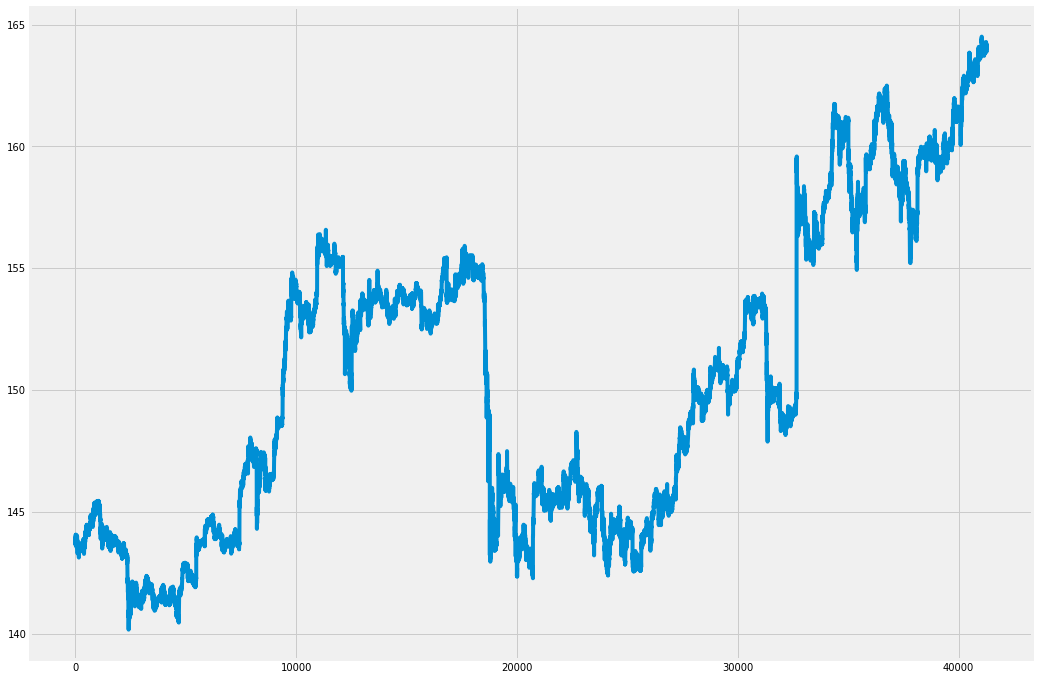

In [7]:
 df['NASDAQ.AAPL'].plot(figsize=(16, 12))

Check Stationarity of the series

In [8]:
def get_mean_var(series, no_of_samples):
    split_size = int(len(series) / no_of_samples)
    start = 0
    for i in range(no_of_samples):
        sample_series = series[i*split_size:(i+1)*split_size]
        print('Mean= %.2f, Variance= %.2f' % (sample_series.mean(), sample_series.var()))

def plot_rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=1000).mean()
    rolstd = timeseries.rolling(window=1000).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(10,20))

    plt.show()
    
    

def dickey_fuller_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC') # Akaike information criterion
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    
def test_stationarity(timeseries):
    
    plot_rolling_statistics(timeseries)
    dickey_fuller_test(timeseries)
    
def find_best_model():

    p=0
    q=0
    d=1

    pdq=[]
    aic=[]

    for p in range(3):
        for q in range(4):
            try:
                model = sm.tsa.ARIMA(ararray, (p,d,q)).fit()
                x = model.aic
                x1 = (p,d,q)
            
                print (x1, x)
                aic.append(x)
                pdq.append(x1)
            except:
                pass
        
    keys = pdq
    values = aic
    d = dict(zip(keys, values))

# Best Model

    minaic=min(d, key=d.get)
    print ("\nBest Model is :", minaic)
    return(minaic)

In [9]:
get_mean_var(df['NASDAQ.AAPL'].values, 10)

Mean= 142.97, Variance= 1.74
Mean= 143.86, Variance= 3.32
Mean= 152.13, Variance= 11.20
Mean= 153.31, Variance= 0.52
Mean= 149.90, Variance= 24.46
Mean= 145.30, Variance= 1.09
Mean= 146.29, Variance= 5.95
Mean= 151.48, Variance= 5.94
Mean= 158.91, Variance= 4.12
Mean= 160.38, Variance= 4.54


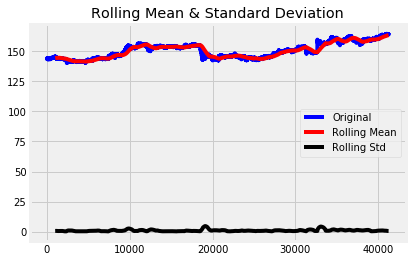

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -0.912853
p-value                            0.783710
#Lags Used                        31.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [10]:
test_stationarity(df['NASDAQ.AAPL'])

The above values are not stationary since the p-value is higher and the values of mean are increasing.

Test Statistic > Critical Value (5%) , It is not  statenary

Use differencing to stationarize the values

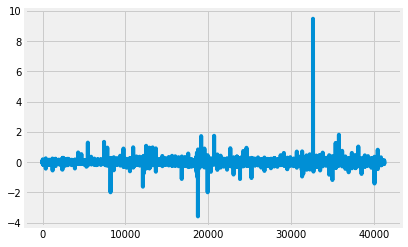

In [11]:
df['First Difference'] = df['NASDAQ.AAPL'] - df['NASDAQ.AAPL'].shift()
df['First Difference'].plot()

Test the stationarity of the new series after differentiation

In [12]:
get_mean_var(df['First Difference'].values, 20)

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.03
Mean= 0.00, Variance= 0.01
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.05
Mean= 0.00, Variance= 0.01
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.01


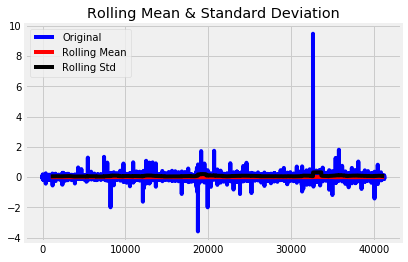

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -35.737741
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [13]:
test_stationarity(df['First Difference'][1:])

The series is not stationary yet since there is still no consistent pattern. So perform log transformations

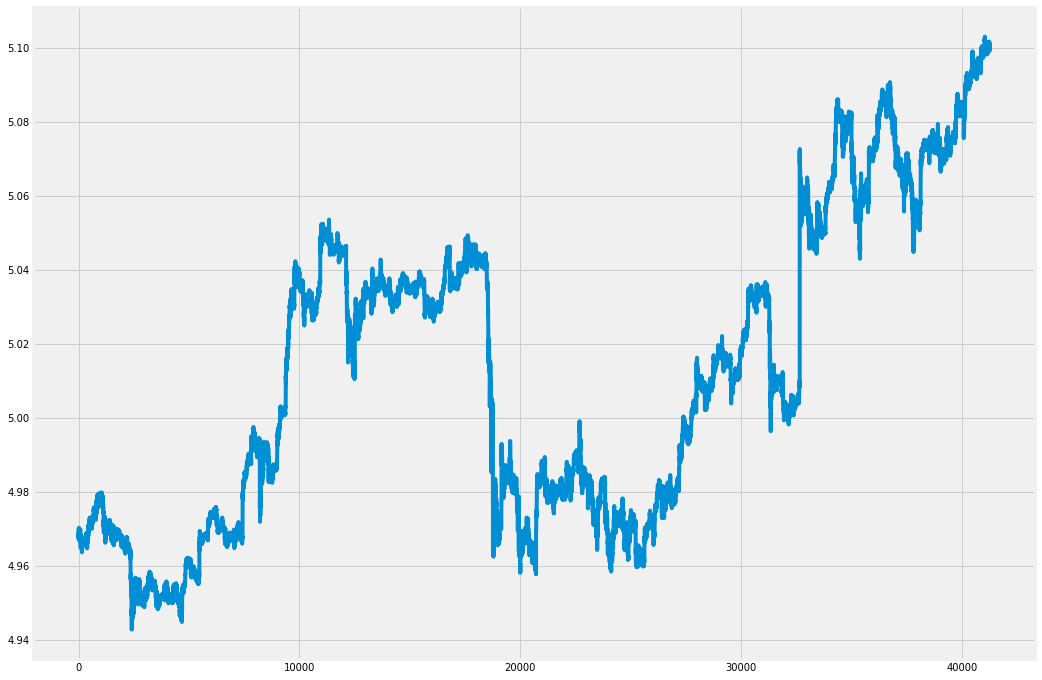

In [14]:
df['Natural Log'] = df['NASDAQ.AAPL'].apply(lambda x: np.log(x))
df['Natural Log'].plot(figsize=(16, 12))

Mean= 4.97, Variance= 0.00
Mean= 4.95, Variance= 0.00
Mean= 4.96, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 5.01, Variance= 0.00
Mean= 5.04, Variance= 0.00
Mean= 5.03, Variance= 0.00
Mean= 5.03, Variance= 0.00
Mean= 5.04, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 4.97, Variance= 0.00
Mean= 5.00, Variance= 0.00
Mean= 5.02, Variance= 0.00
Mean= 5.02, Variance= 0.00
Mean= 5.06, Variance= 0.00
Mean= 5.07, Variance= 0.00
Mean= 5.07, Variance= 0.00
Mean= 5.09, Variance= 0.00


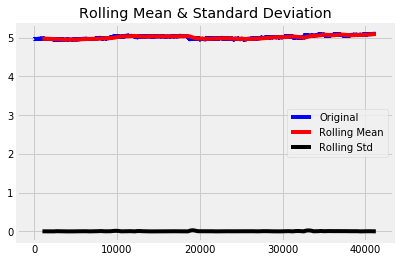

<Figure size 720x1440 with 0 Axes>

In [15]:
get_mean_var(df['Natural Log'].values, 20)
plot_rolling_statistics(df['Natural Log'])

The series is not stationary still. So combine both the options

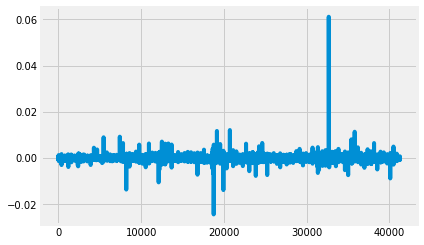

In [16]:
df['Logged First Difference'] = df['Natural Log'] - df['Natural Log'].shift(1)
df['Logged First Difference'].plot()

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


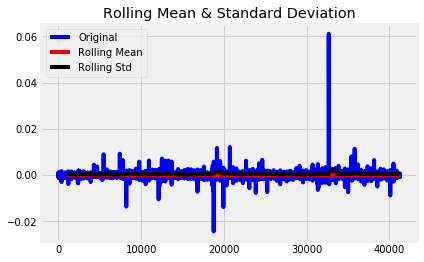

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -35.706087
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [17]:
get_mean_var(df['Logged First Difference'].values, 20)
test_stationarity(df['Logged First Difference'][1:])

Plot ACF and PACF for the values

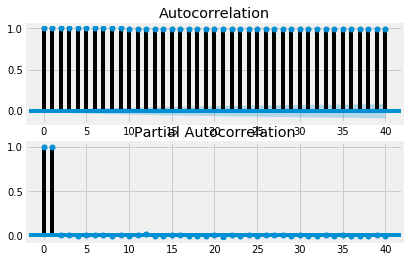

In [18]:
# Plot of the actual values 
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.AAPL'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.AAPL'].values.squeeze(), lags=40, ax=ax2)

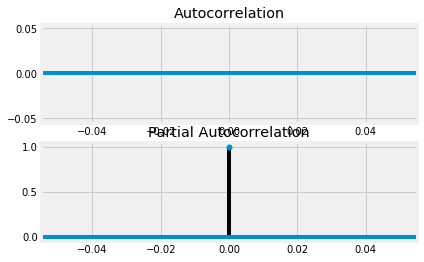

In [19]:
# Plot the values for Logged first difference.

fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Logged First Difference'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Logged First Difference'].values.squeeze(), lags=40, ax=ax2)

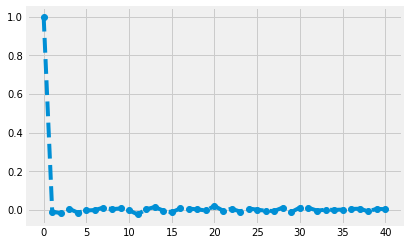

In [20]:
# Plot the correlations
from statsmodels.tsa.stattools import acf 
from statsmodels.tsa.stattools import pacf
    
lag_correlations = acf(df['Logged First Difference'].iloc[1:])
lag_partial_correlations = pacf(df['Logged First Difference'].iloc[1:])

fig, ax = plt.subplots()
ax.plot(lag_correlations, marker='o', linestyle='--')

Get the Durbin-Watson Values

In [21]:
# DW values for the original values
sm.stats.durbin_watson(df['NASDAQ.AAPL'][1:])

3.8592950780363566e-07

In [22]:
# DW values for the logged difference 
sm.stats.durbin_watson(df['Logged First Difference'][1:])

2.018442039864313

The Durbin Watson value is around 2. So the errors are not correlated.

Build the ARIMA model

In [23]:
df.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)

In [24]:
# Determine the best values for p and q
ararray = (df['NASDAQ.AAPL'].dropna())
minaic=find_best_model()

(0, 1, 0) -78429.72801910112
(0, 1, 1) -78432.1556461454
(0, 1, 2) -78443.49268819732
(0, 1, 3) -78442.45834556632
(1, 1, 0) -78431.99787673421
(1, 1, 1) -78439.03878680148
(1, 1, 2) -78446.4472180403
(2, 1, 0) -78443.25287041417
(2, 1, 1) -78446.29180026334

Best Model is : (1, 1, 2)


In [25]:
print(minaic)

(1, 1, 2)


In [26]:
# Train the model 
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmod = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

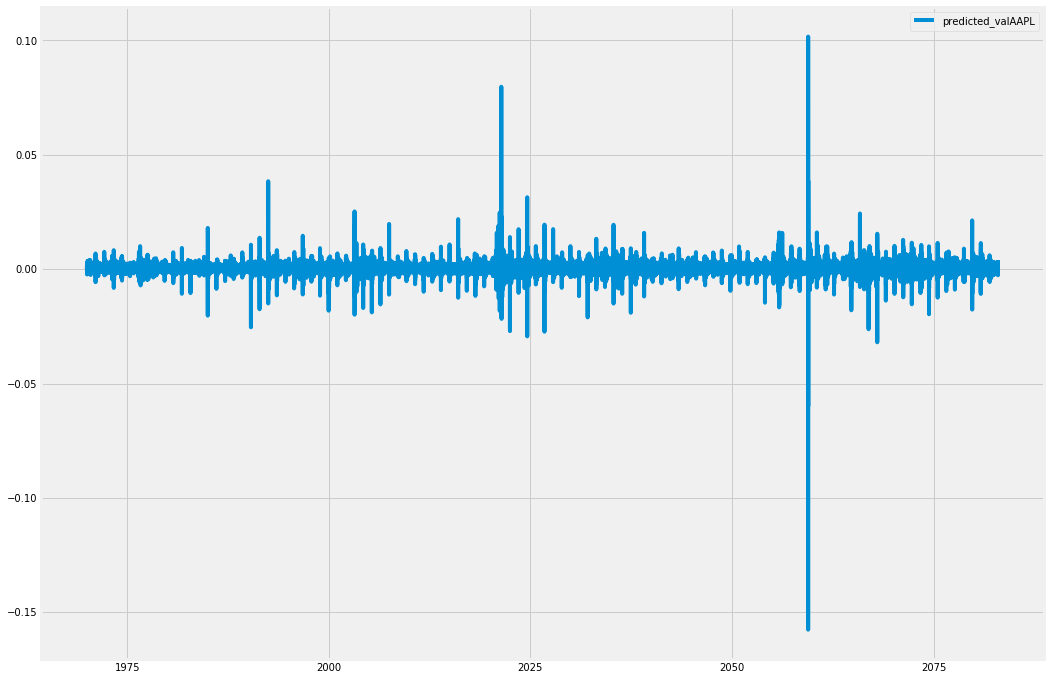

In [27]:
df['predicted_valAAPL'] = ARIMIAmod.predict()
df[['predicted_valAAPL']].plot(figsize=(16, 12))
#ARIMIAmod.forecast(steps=10)

2) generate forecasts for stock  NASDAQ.ADP

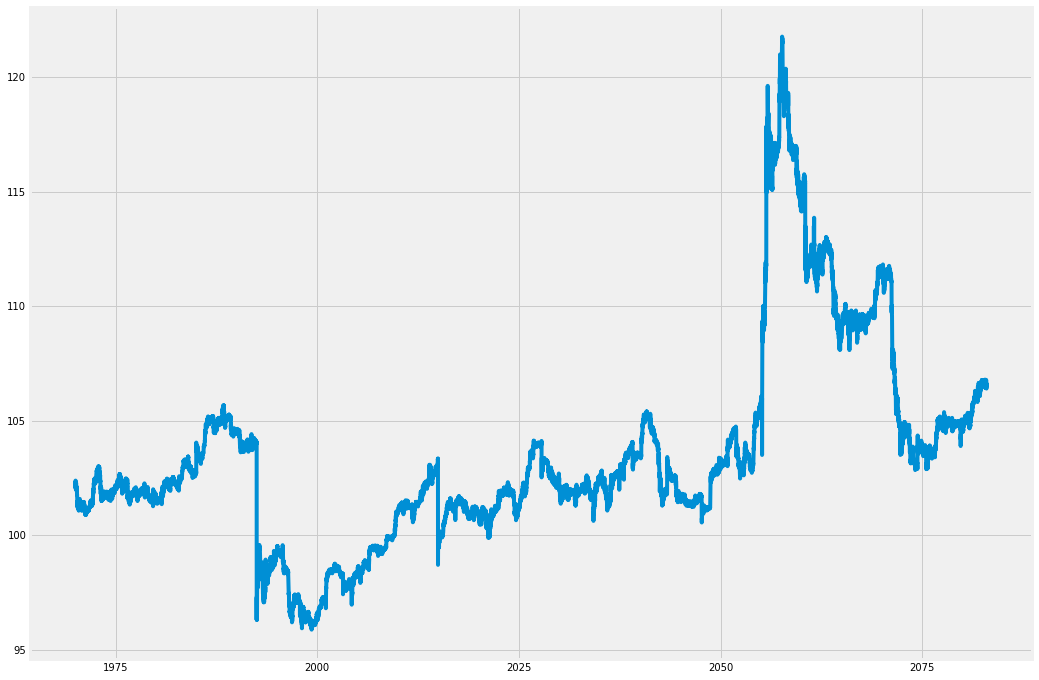

In [76]:
 df['NASDAQ.ADP'].plot(figsize=(16, 12))

In [77]:
get_mean_var(df['NASDAQ.ADP'].values, 10)

Mean= 101.82, Variance= 0.17
Mean= 103.77, Variance= 1.38
Mean= 97.74, Variance= 0.98
Mean= 100.29, Variance= 2.21
Mean= 101.29, Variance= 0.41
Mean= 102.40, Variance= 0.50
Mean= 102.67, Variance= 1.61
Mean= 109.57, Variance= 44.12
Mean= 110.55, Variance= 2.25
Mean= 104.71, Variance= 0.91


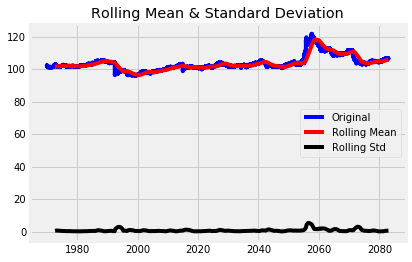

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -1.704174
p-value                            0.428963
#Lags Used                        39.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [78]:
test_stationarity(df['NASDAQ.ADP'])

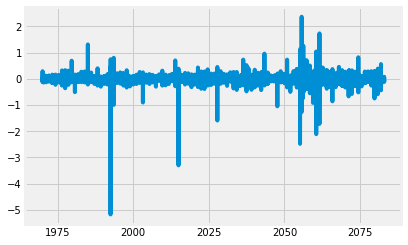

In [79]:
df['First Diff ADP'] = df['NASDAQ.ADP'] - df['NASDAQ.ADP'].shift()
df['First Diff ADP'].plot()

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.02
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.01, Variance= 0.03
Mean= -0.00, Variance= 0.02
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


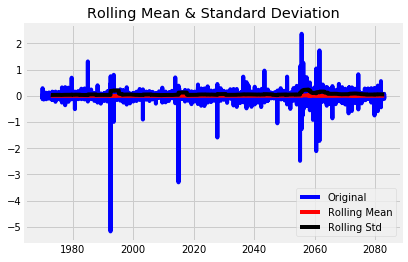

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -31.055662
p-value                            0.000000
#Lags Used                        38.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [80]:
# Check for stationarity after difference
get_mean_var(df['First Diff ADP'].values, 20)
test_stationarity(df['First Diff ADP'][1:])

The Variance is still varying. So apply logarithmic transformation

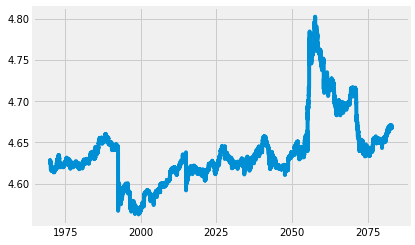

In [81]:
df['Natural LogADP'] = df['NASDAQ.ADP'].apply(lambda x: np.log(x))
df['Natural LogADP'].plot()

Mean= 4.62, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.64, Variance= 0.00
Mean= 4.65, Variance= 0.00
Mean= 4.59, Variance= 0.00
Mean= 4.58, Variance= 0.00
Mean= 4.60, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.63, Variance= 0.00
Mean= 4.63, Variance= 0.00
Mean= 4.64, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.64, Variance= 0.00
Mean= 4.75, Variance= 0.00
Mean= 4.71, Variance= 0.00
Mean= 4.70, Variance= 0.00
Mean= 4.65, Variance= 0.00
Mean= 4.66, Variance= 0.00


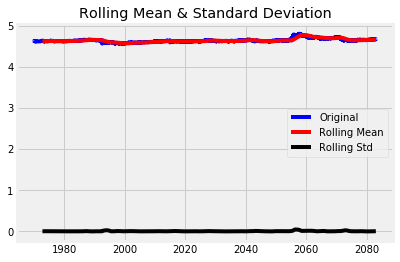

<Figure size 720x1440 with 0 Axes>

In [82]:
get_mean_var(df['Natural LogADP'].values, 20)
plot_rolling_statistics(df['Natural LogADP'])

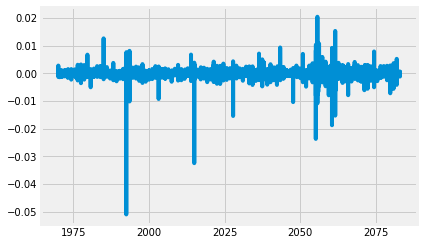

In [83]:
df['Logged First DiffADP'] = df['Natural LogADP'] - df['Natural LogADP'].shift(1)
df['Logged First DiffADP'].plot()

In [84]:
get_mean_var(df['Logged First DiffADP'].values, 20)

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


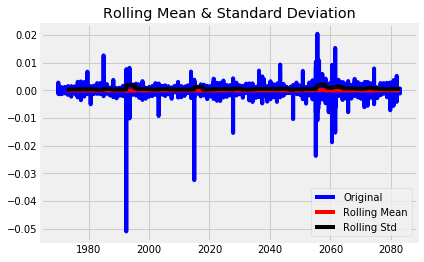

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.760414
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    41225.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [85]:
# plot
test_stationarity(df['Logged First DiffADP'][1:])

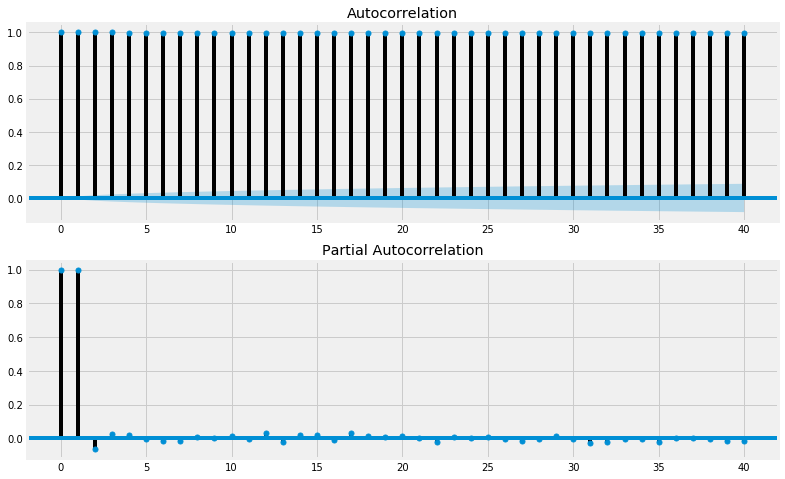

In [86]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.ADP'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.ADP'].values.squeeze(), lags=40, ax=ax2)

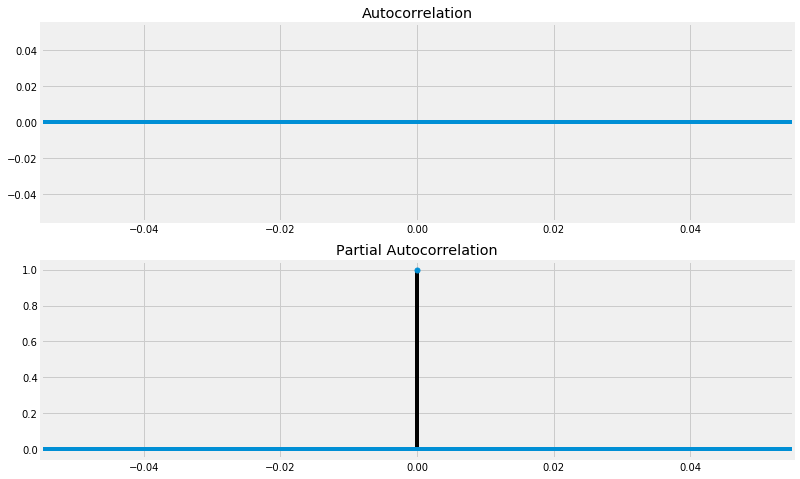

In [87]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Logged First DiffADP'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Logged First DiffADP'].values.squeeze(), lags=40, ax=ax2)

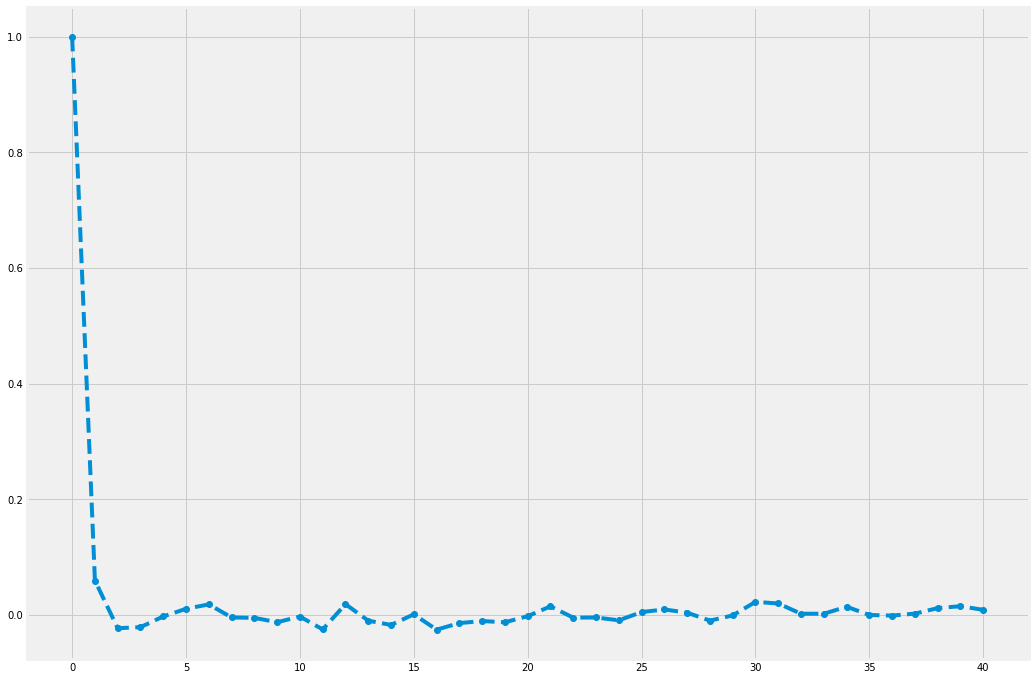

In [88]:
lag_correlADP = acf(df['Logged First DiffADP'].iloc[1:])
lag_partial_correlADP = pacf(df['Logged First DiffADP'].iloc[1:])

fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlADP, marker='o', linestyle='--')

In [89]:
sm.stats.durbin_watson(df['NASDAQ.ADP'][1:])

5.150393740408954e-07

In [90]:
sm.stats.durbin_watson(df['Logged First DiffADP'][1:])

1.8805311236919464

Since the value of DW value is very much nearer to 2, there is no serious serial correlation

In [91]:
ararray = (df['NASDAQ.ADP'].dropna())
minaic = find_best_model()

(0, 1, 0) -97402.88015237625
(0, 1, 1) -97541.72532925202
(0, 1, 2) -97556.28548904776
(0, 1, 3) -97569.80700873033
(1, 1, 0) -97535.2920296235
(1, 1, 1) -97549.46127567979
(1, 1, 2) -97562.5776372662
(1, 1, 3) -97567.80756610638
(2, 1, 0) -97560.41891654278
(2, 1, 1) -97565.5508686314
(2, 1, 2) -97576.12284769124
(2, 1, 3) -97585.0414429401

Best Model is : (2, 1, 3)


In [92]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
    
ARIMIAmodADP = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

In [93]:
df['predicted_valADP'] = ARIMIAmodADP.predict()

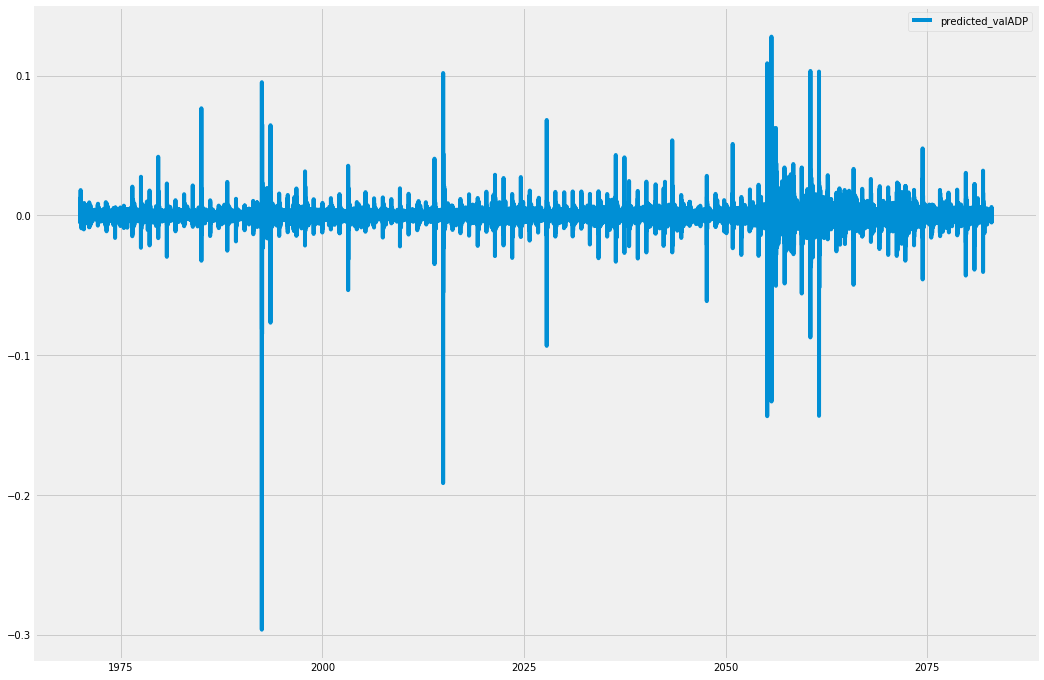

In [94]:
df[['predicted_valADP']].plot(figsize=(16, 12))
#ARIMIAmodADP.forecast(steps=10)

3) generate forecasts for stock NASDAQ.CBOE

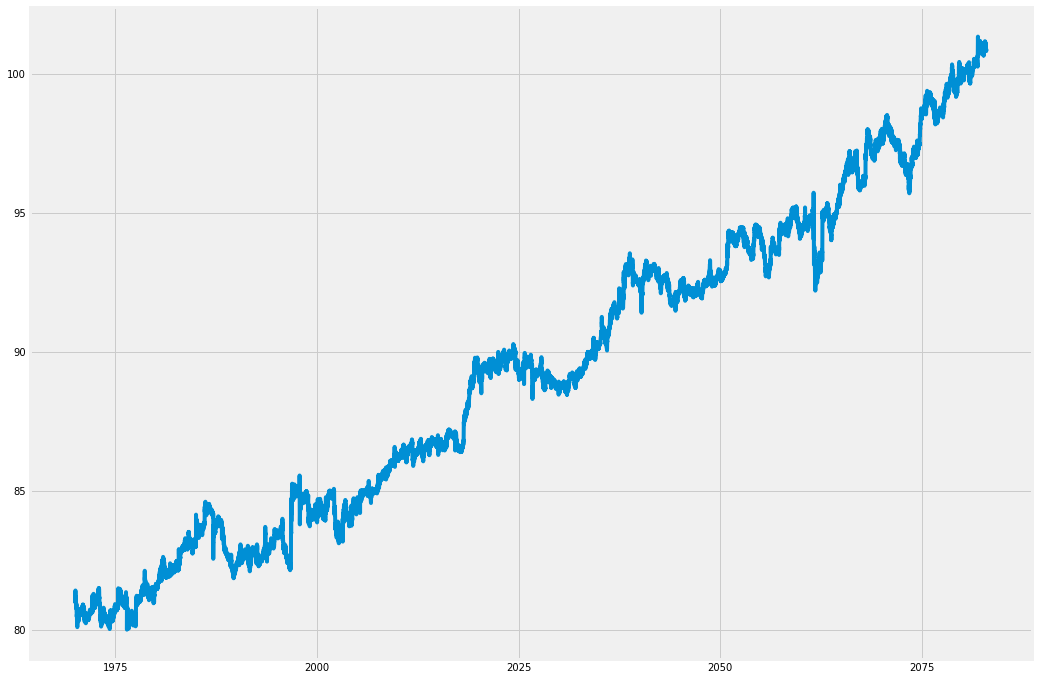

In [95]:
 df['NASDAQ.CBOE'].plot(figsize=(16, 12))

Mean= 80.96, Variance= 0.30
Mean= 83.00, Variance= 0.48
Mean= 83.86, Variance= 0.70
Mean= 85.76, Variance= 0.69
Mean= 88.67, Variance= 1.56
Mean= 89.70, Variance= 0.90
Mean= 92.48, Variance= 0.16
Mean= 93.88, Variance= 0.48
Mean= 96.04, Variance= 2.28
Mean= 98.90, Variance= 1.89


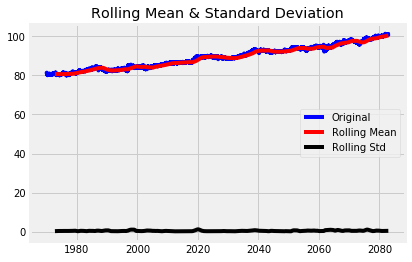

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                     0.166339
p-value                            0.970309
#Lags Used                        27.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [96]:
get_mean_var(df['NASDAQ.CBOE'].values, 10)
test_stationarity(df['NASDAQ.CBOE'])

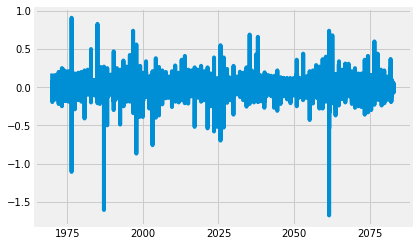

In [97]:
# Difference the series 
df['First DiffCBOE'] = df['NASDAQ.CBOE'] - df['NASDAQ.CBOE'].shift()
df['First DiffCBOE'].plot()

Mean= nan, Variance= nan
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


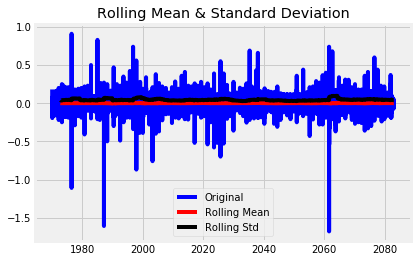

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -41.642094
p-value                            0.000000
#Lags Used                        26.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [98]:
# Check the stationarity after first difference
get_mean_var(df['First DiffCBOE'].values, 20)
test_stationarity(df['First DiffCBOE'][1:])

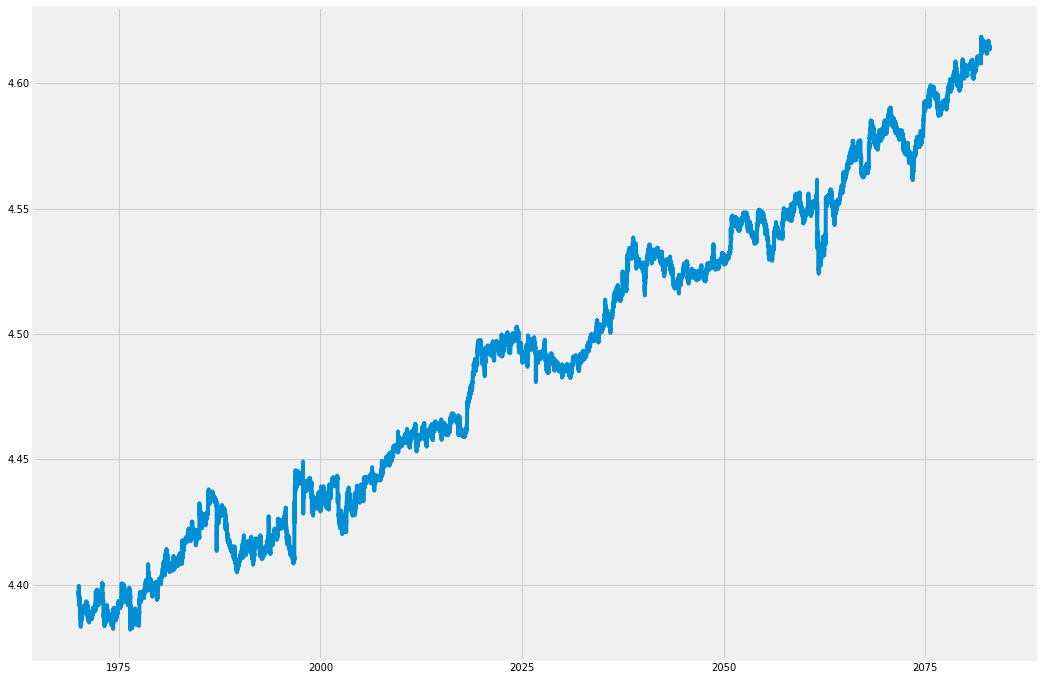

In [99]:
#Perform the Logarithmic transformation
df['Natural LogCBOE'] = df['NASDAQ.CBOE'].apply(lambda x: np.log(x))
df['Natural LogCBOE'].plot(figsize=(16, 12))

In [100]:
get_mean_var(df['Natural LogCBOE'].values, 20)

Mean= 4.39, Variance= 0.00
Mean= 4.40, Variance= 0.00
Mean= 4.42, Variance= 0.00
Mean= 4.42, Variance= 0.00
Mean= 4.42, Variance= 0.00
Mean= 4.43, Variance= 0.00
Mean= 4.44, Variance= 0.00
Mean= 4.46, Variance= 0.00
Mean= 4.47, Variance= 0.00
Mean= 4.50, Variance= 0.00
Mean= 4.49, Variance= 0.00
Mean= 4.50, Variance= 0.00
Mean= 4.53, Variance= 0.00
Mean= 4.52, Variance= 0.00
Mean= 4.54, Variance= 0.00
Mean= 4.54, Variance= 0.00
Mean= 4.55, Variance= 0.00
Mean= 4.58, Variance= 0.00
Mean= 4.58, Variance= 0.00
Mean= 4.61, Variance= 0.00


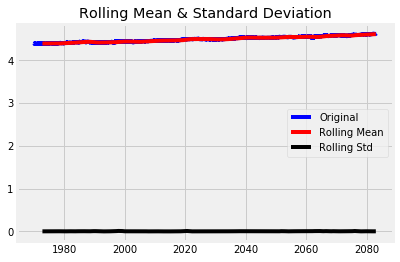

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -0.030919
p-value                            0.955899
#Lags Used                        26.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [101]:
test_stationarity(df['Natural LogCBOE'][1:])

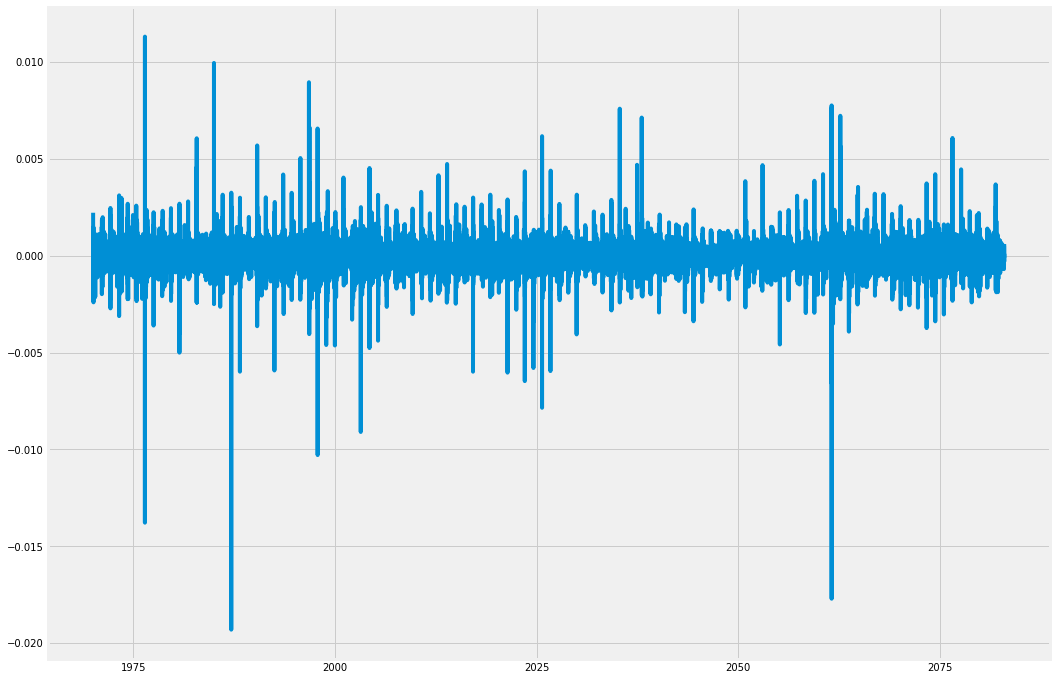

In [102]:
# Combine the difference and log transform
df['Logged First DiffCBOE'] = df['Natural LogCBOE'] - df['Natural LogCBOE'].shift(1)
df['Logged First DiffCBOE'].plot(figsize=(16, 12))

Mean= nan, Variance= nan
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


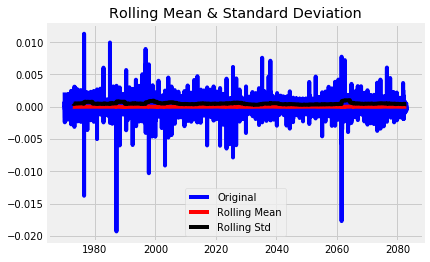

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -42.183172
p-value                            0.000000
#Lags Used                        25.000000
Number of Observations Used    41239.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [103]:
get_mean_var(df['Logged First DiffCBOE'].values, 20)
test_stationarity(df['Logged First DiffCBOE'][1:])

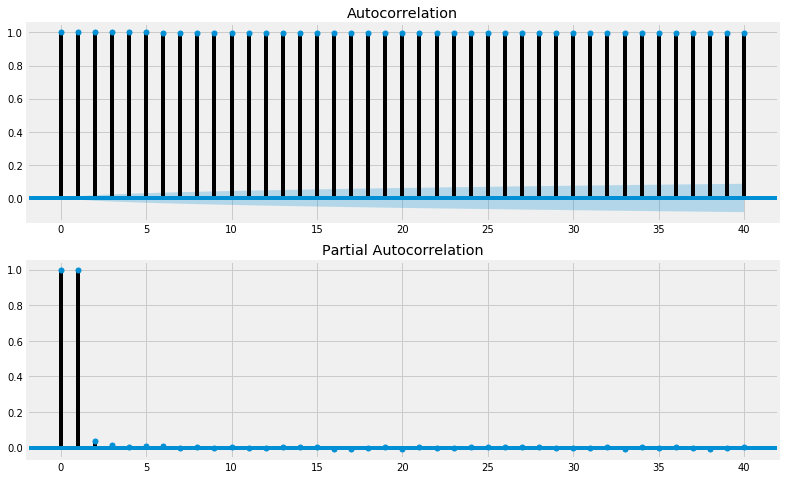

In [104]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.CBOE'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.CBOE'].values.squeeze(), lags=40, ax=ax2)

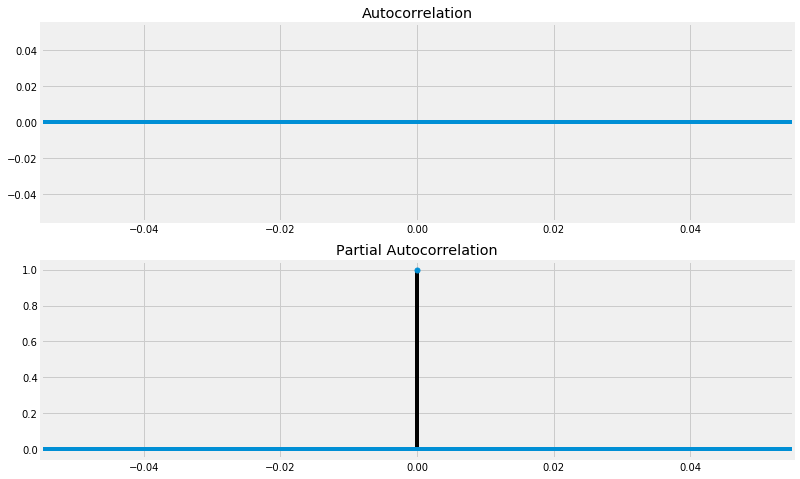

In [105]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Logged First DiffCBOE'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Logged First DiffCBOE'].values.squeeze(), lags=40, ax=ax2)

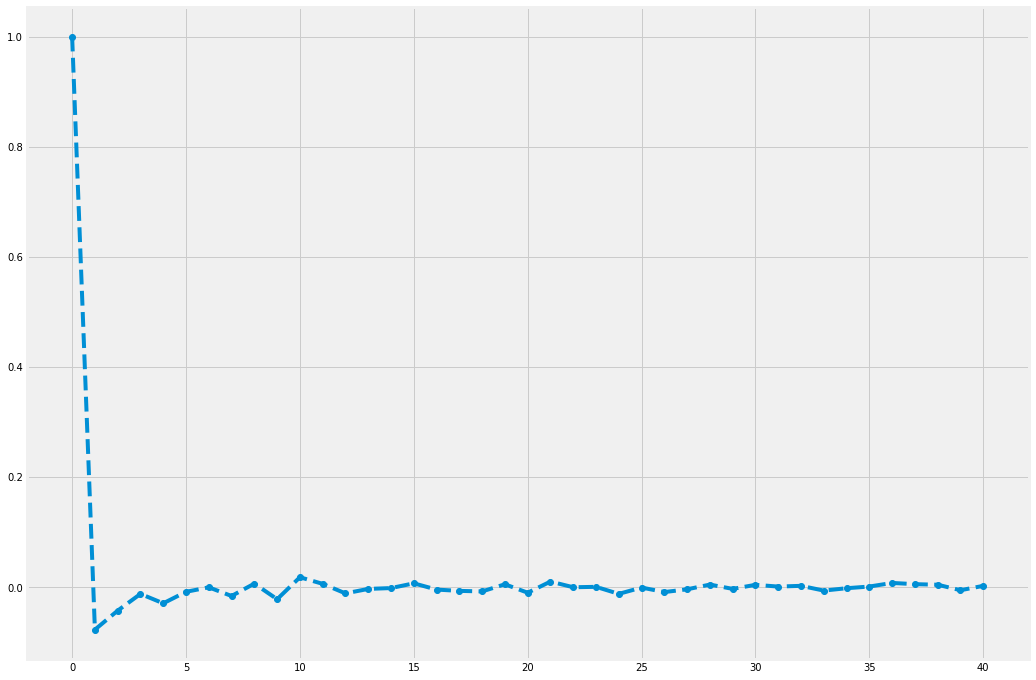

In [106]:
lag_correlCBOE = acf(df['Logged First DiffCBOE'].iloc[1:])
lag_partial_correlCBOE = pacf(df['Logged First DiffCBOE'].iloc[1:])
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlCBOE, marker='o', linestyle='--')

In [107]:
sm.stats.durbin_watson(df['NASDAQ.CBOE'][1:])

2.710396606220063e-07

In [108]:
sm.stats.durbin_watson(df['Logged First DiffCBOE'][1:])

2.1531316991494767

Since the value of DW value is very much nearer to 2, there is no serious serial correlation

In [109]:
ararray = (df['NASDAQ.CBOE'].dropna())
minaic = find_best_model()

C:\Users\Sanjana\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 0) -135929.5615569277
(0, 1, 1) -136187.63017118812
(0, 1, 2) -136279.97434170733
(0, 1, 3) -136287.70894499696
(1, 1, 0) -136162.63099855313
(1, 1, 1) -136322.22070470444
(1, 1, 2) -136321.82819404468
(1, 1, 3) -136324.06471290326
(2, 1, 0) -136262.9135403327
(2, 1, 1) -136321.7327807173
(2, 1, 2) -136321.3500507404
(2, 1, 3) -136327.60804573476

Best Model is : (2, 1, 3)


In [110]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmodCBOE = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

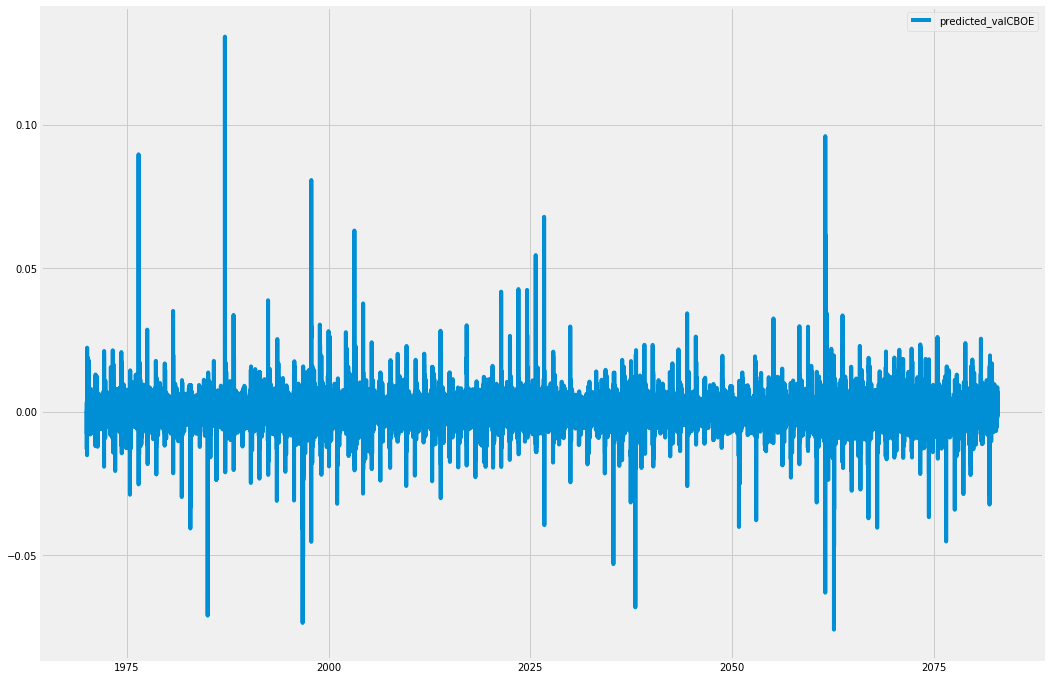

In [111]:
df['predicted_valCBOE'] = ARIMIAmodCBOE.predict()
df[['predicted_valCBOE']].plot(figsize=(16, 12))

4) generate forecasts for stock NASDAQ.CSCO

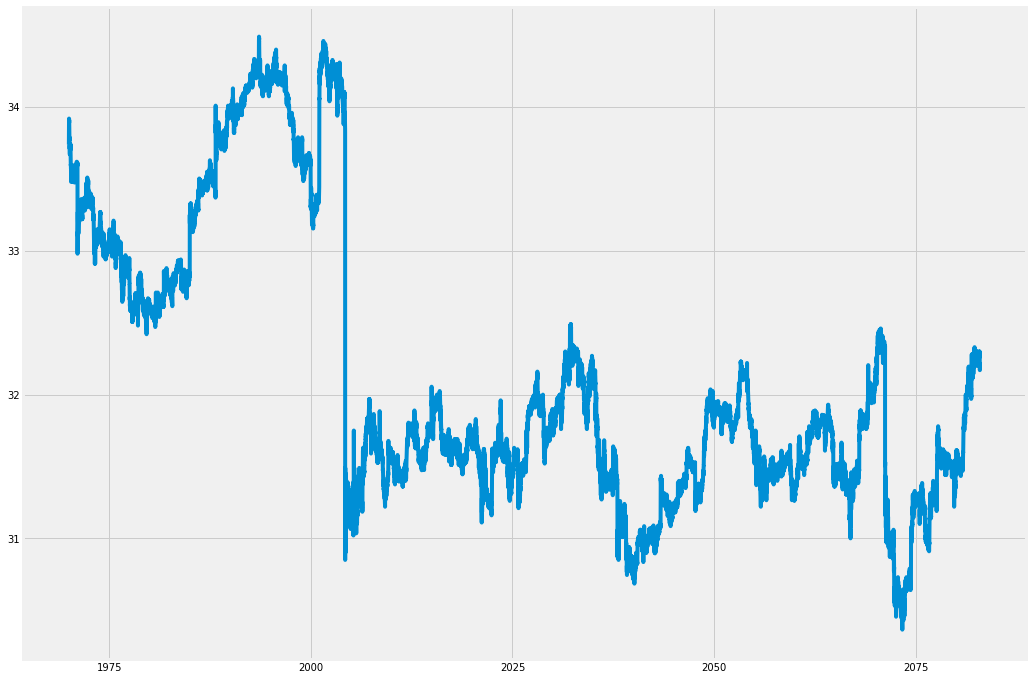

In [112]:
df['NASDAQ.CSCO'].plot(figsize=(16, 12))

Mean= 32.99, Variance= 0.11
Mean= 33.41, Variance= 0.26
Mean= 34.01, Variance= 0.11
Mean= 31.62, Variance= 0.23
Mean= 31.58, Variance= 0.03
Mean= 31.88, Variance= 0.08
Mean= 31.18, Variance= 0.06
Mean= 31.69, Variance= 0.06
Mean= 31.70, Variance= 0.10
Mean= 31.34, Variance= 0.24


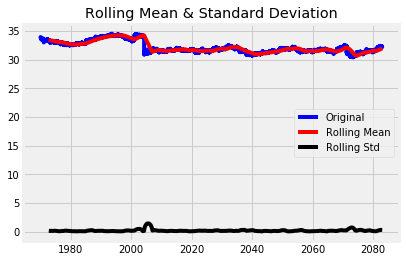

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -2.395555
p-value                            0.142995
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [113]:
get_mean_var(df['NASDAQ.CSCO'].values, 10)
test_stationarity(df['NASDAQ.CSCO'])

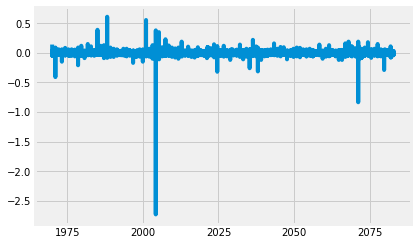

In [114]:
df['First DiffCSCO'] = df['NASDAQ.CSCO'] - df['NASDAQ.CSCO'].shift()
df['First DiffCSCO'].plot()

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


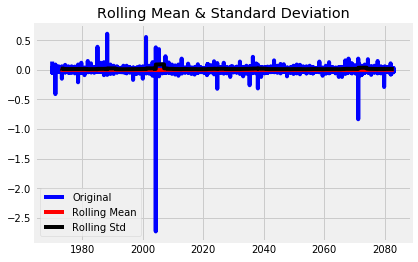

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.356683
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [115]:
get_mean_var(df['First DiffCSCO'].values, 20)
test_stationarity(df['First DiffCSCO'][1:])

Differencing has made the series stationary

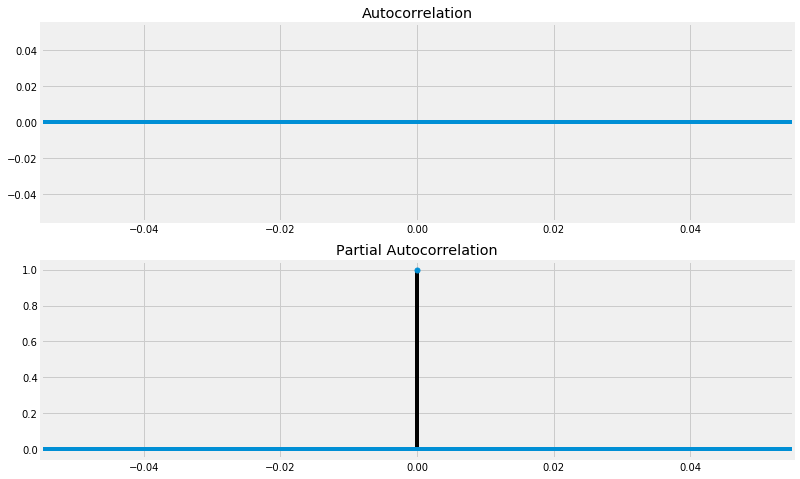

In [116]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First DiffCSCO'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First DiffCSCO'].values.squeeze(), lags=40, ax=ax2)

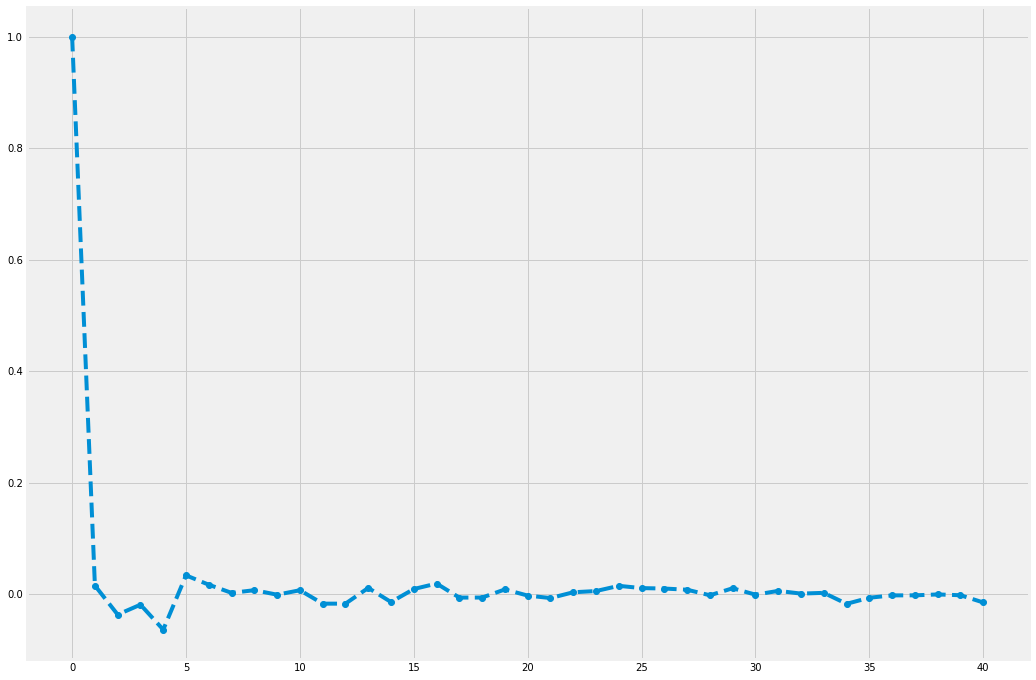

In [117]:
lag_correlCSCO = acf(df['First DiffCSCO'].iloc[1:])
lag_partial_correlCSCO = pacf(df['First DiffCSCO'].iloc[1:])
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlCSCO, marker='o', linestyle='--')

In [118]:
sm.stats.durbin_watson(df['NASDAQ.CSCO'][1:])

4.4097905909347416e-07

In [119]:
sm.stats.durbin_watson(df['First DiffCSCO'][1:])

1.967766037248009

The value of Durbin Watson values is near to 2. So no serial correlation exists

In [120]:
ararray = (df['NASDAQ.CSCO'].dropna())
minaic = find_best_model()

(0, 1, 0) -200306.80085156744
(0, 1, 1) -200315.60034901282
(0, 1, 2) -200374.9020897547
(0, 1, 3) -200380.84782920015
(1, 1, 0) -200314.81575446512
(1, 1, 1) -200391.8955289164
(1, 1, 2) -200407.9935453899
(1, 1, 3) -200407.65184756625
(2, 1, 0) -200368.48805457406
(2, 1, 1) -200410.27260656573
(2, 1, 2) -200441.31287136942
(2, 1, 3) -200447.1083086126

Best Model is : (2, 1, 3)


In [121]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmodCSCO = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

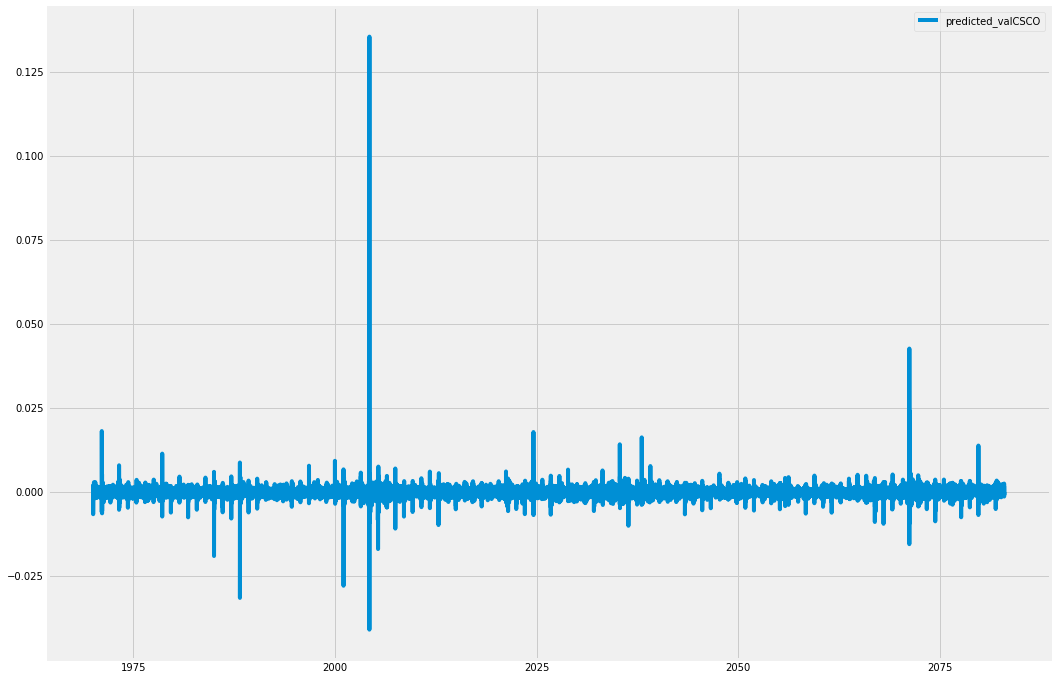

In [122]:
df['predicted_valCSCO'] = ARIMIAmodCSCO.predict()
df[['predicted_valCSCO']].plot(figsize=(16, 12))

5) generate forecasts for stockNASDAQ.EBAY

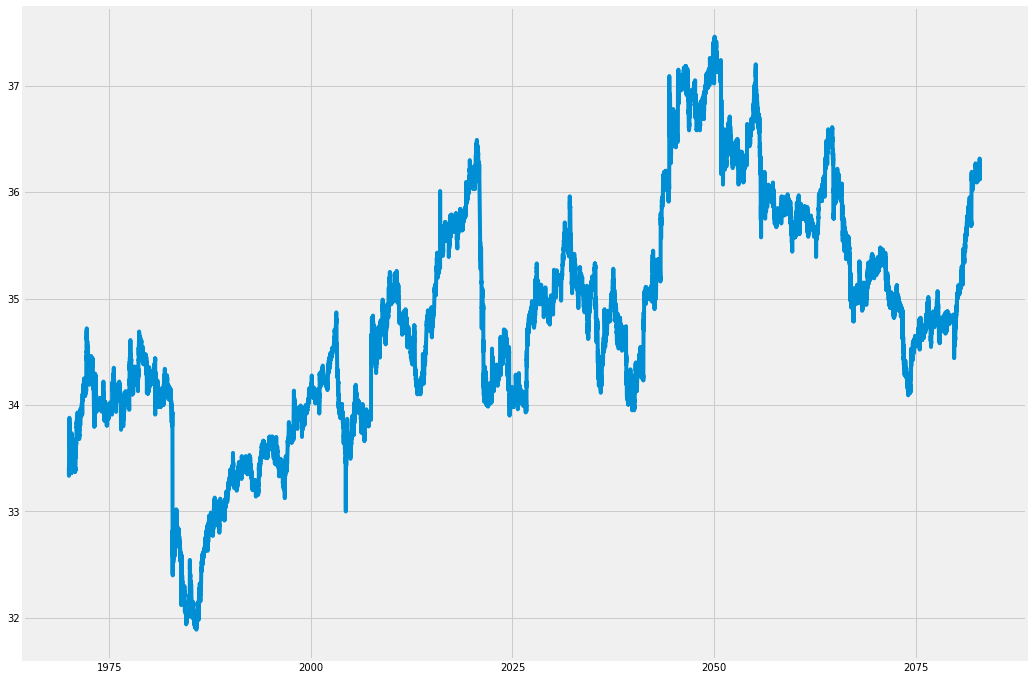

In [124]:
df['NASDAQ.EBAY'].plot(figsize=(16, 12))

In [125]:
get_mean_var(df['NASDAQ.EBAY'].values, 10)

Mean= 34.10, Variance= 0.07
Mean= 33.00, Variance= 0.39
Mean= 33.84, Variance= 0.15
Mean= 34.42, Variance= 0.22
Mean= 35.04, Variance= 0.62
Mean= 34.99, Variance= 0.11
Mean= 35.68, Variance= 1.16
Mean= 36.33, Variance= 0.24
Mean= 35.59, Variance= 0.19
Mean= 34.97, Variance= 0.26


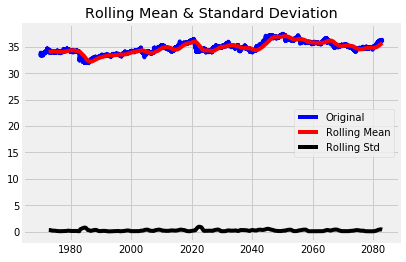

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -1.875762
p-value                            0.343548
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [126]:
test_stationarity(df['NASDAQ.EBAY'])

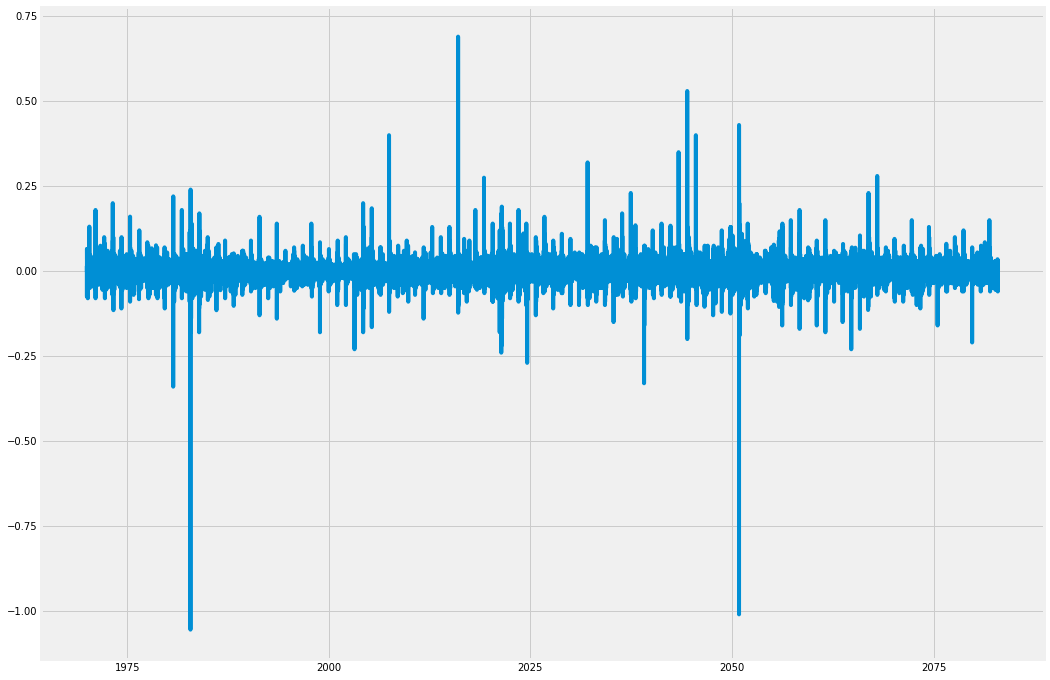

In [127]:
df['First DiffEBAY'] = df['NASDAQ.EBAY'] - df['NASDAQ.EBAY'].shift()
df['First DiffEBAY'].plot(figsize=(16, 12))

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


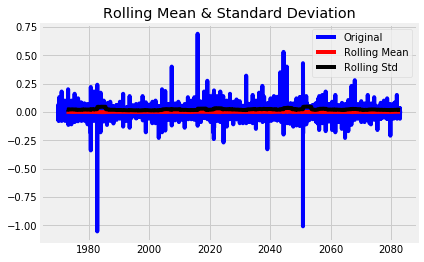

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.679619
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [128]:
get_mean_var(df['First DiffEBAY'].values, 20)
test_stationarity(df['First DiffEBAY'][1:])

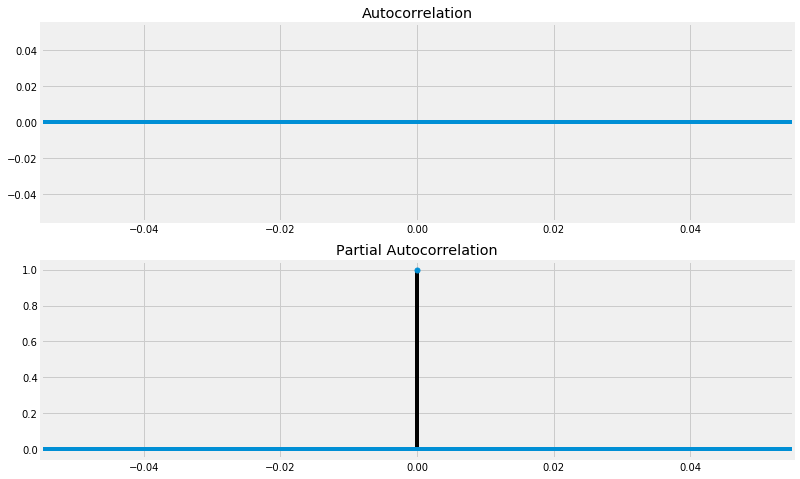

In [129]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First DiffEBAY'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First DiffEBAY'].values.squeeze(), lags=40, ax=ax2)

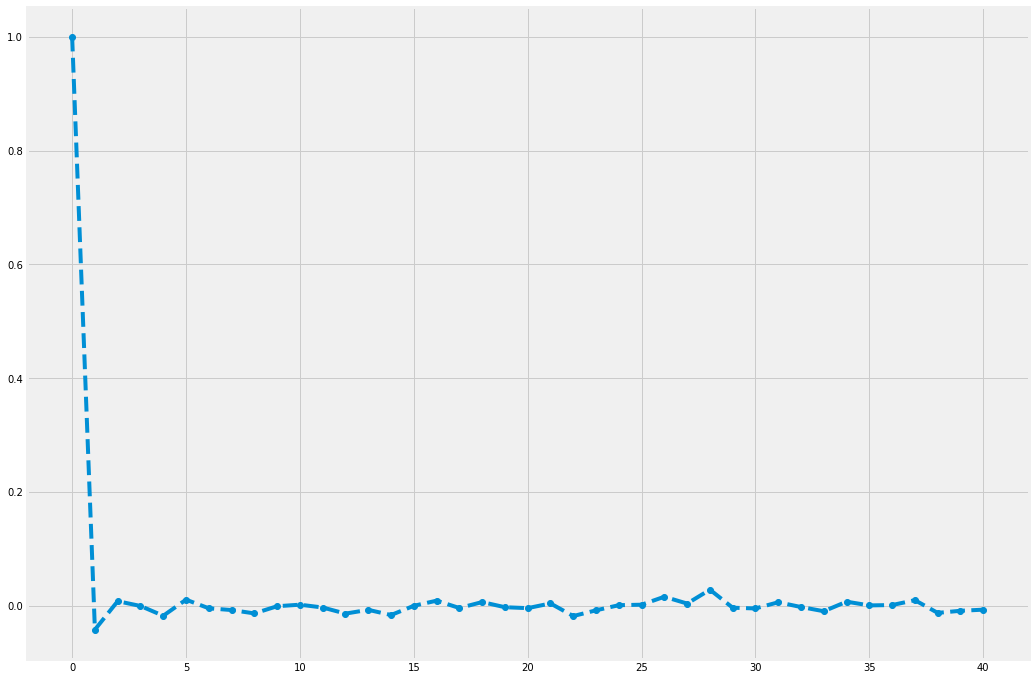

In [130]:
lag_correlEBAY = acf(df['First DiffEBAY'].iloc[1:])
lag_partial_correlCSCO = pacf(df['First DiffEBAY'].iloc[1:])
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlEBAY, marker='o', linestyle='--')

In [131]:
sm.stats.durbin_watson(df['NASDAQ.EBAY'][1:])

4.4542920662485257e-07

In [132]:
sm.stats.durbin_watson(df['First DiffEBAY'][1:])

2.0827114523787174

The value of Durbin Watson values is near to 2. So no serial correlation exists

In [133]:
ararray = (df['NASDAQ.EBAY'].dropna())
minaic = find_best_model()

(0, 1, 0) -193381.93463551922
(0, 1, 1) -193449.52833412733
(0, 1, 2) -193450.6400807585
(0, 1, 3) -193448.71431397676
(1, 1, 0) -193450.6060510131
(1, 1, 1) -193450.26908807602
(1, 1, 2) -193448.65531595924
(2, 1, 0) -193450.57006432023

Best Model is : (0, 1, 2)


In [134]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmodEBAY = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

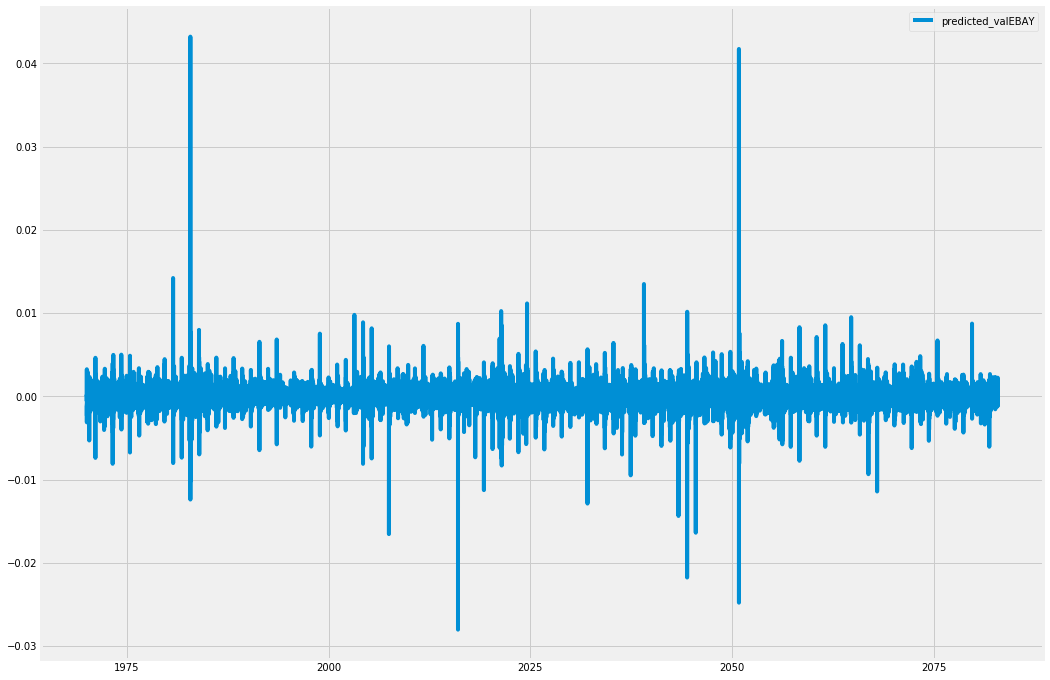

In [135]:
df['predicted_valEBAY'] = ARIMIAmodEBAY.predict()
df[['predicted_valEBAY']].plot(figsize=(16, 12))